In [8]:
# TIME SERIES FORECASTING USING PYTHON #
### USING PYTHON FOR ECONOMETRICS GUIDE FORM UNIVERSITY OF GOETTINGEN

In [9]:
from datetime import datetime
now = datetime.now()
print(now) #today's date time

2023-11-14 16:27:03.446843


In [10]:
print(now.day)
print(now.hour)

14
16


In [11]:
#### You can get attributes year, month, day, hour, minute, second, microsecond

In [12]:
## Set Datetime

In [13]:
holiday = datetime(2023, 12, 24, 8, 30)
print(holiday)

2023-12-24 08:30:00


In [14]:
exam = datetime(2020, 12, 9, 10)
print("The exam will be on the " + "{:%Y-%m-%d}".format(exam))

The exam will be on the 2020-12-09


In [15]:
## Time Difference

In [16]:
from datetime import timedelta
delta = exam - now
print(delta)

-1071 days, 17:32:56.553157


In [17]:
print("The exam took place " + str(delta.days) + " days ago.")

The exam took place -1071 days ago.


In [18]:
## Convert String and Datetime

In [19]:
# Convert Datetime
stamp = datetime(2020, 4, 12)
print(stamp)

2020-04-12 00:00:00


In [20]:
print("German date format: " + stamp.strftime("%d.%m.%Y"))

German date format: 12.04.2020


In [21]:
val = "2020-5-5"
d = datetime.strptime(val, "%Y-%m-%d")
print(d)

2020-05-05 00:00:00


In [22]:
# Converting Examples
val = "31.01.2012"
d = datetime.strptime(val, "%d.%m.%Y")
print(d)

2012-01-31 00:00:00


In [23]:
now.strftime("Today is %A and we are in week %W of the year %Y.")

'Today is Tuesday and we are in week 46 of the year 2023.'

In [24]:
now.strftime("%c")

'Tue Nov 14 16:27:03 2023'

In [25]:
## Generating Date Ranges with Pandas
import pandas as pd
index = pd.date_range("2020-01-01", now)
print(index[0:2])

DatetimeIndex(['2020-01-01', '2020-01-02'], dtype='datetime64[ns]', freq='D')


In [26]:
print(index[15:16])

DatetimeIndex(['2020-01-16'], dtype='datetime64[ns]', freq='D')


In [27]:
index = pd.date_range("2020-01-01", now, freq="M")
print(index[0:5])

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31'],
              dtype='datetime64[ns]', freq='M')


In [28]:
## Resample Date Ranges
import numpy as np
start = datetime(2016, 1, 1)
ind = pd.date_range(start, now)
numbers = np.arange((now-start).days + 1)
df = pd.DataFrame(numbers, index=ind)
print("This produces sequence of date")
print(df.head())
print("This produces 3 business month end dates")
print(df.resample("3BM").sum().head())

This produces sequence of date
            0
2016-01-01  0
2016-01-02  1
2016-01-03  2
2016-01-04  3
2016-01-05  4
This produces 3 business month end dates
                0
2016-01-29    406
2016-04-29   6734
2016-07-29  15015
2016-10-31  24205
2017-01-31  32246


Rolling Mean
Date
2017-02-23    852.190002
2017-02-24    845.239990
2017-02-27    848.640015
2017-02-28    845.039978
2017-03-01    853.080017
Name: Adj Close, dtype: float64


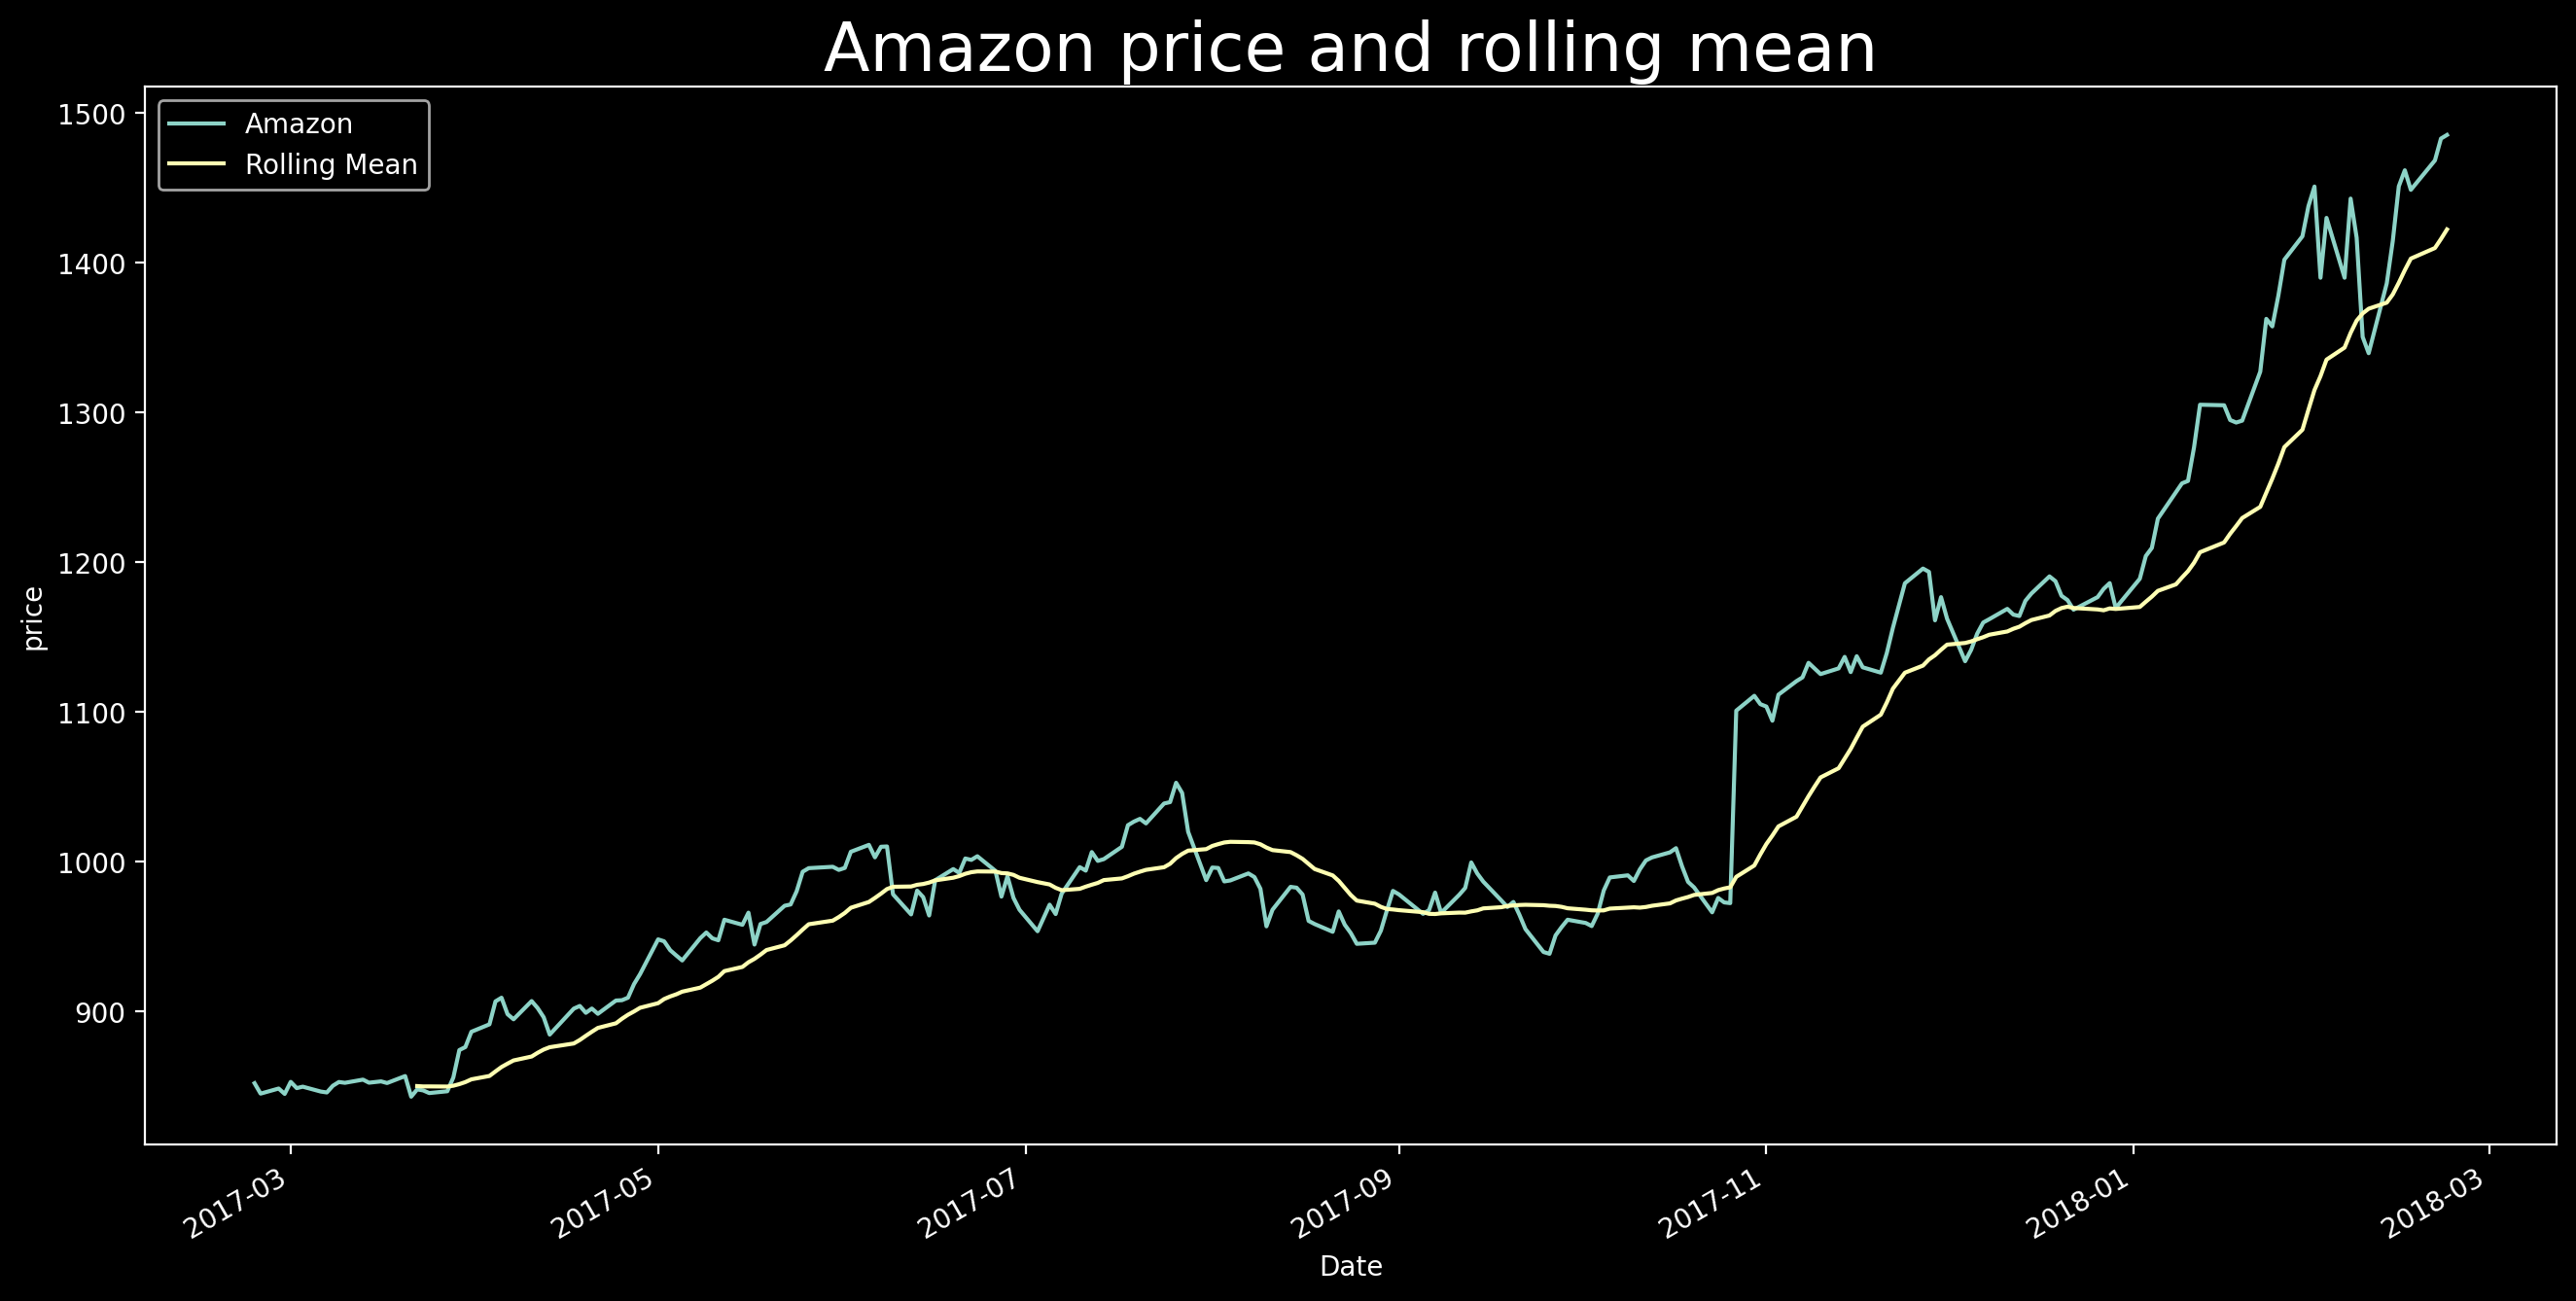

In [1]:
# Moving Window Functions #
print("Rolling Mean")
import matplotlib.pyplot as plt
amazon = pd.read_csv("amzn.csv", index_col=0, parse_dates=True)["Adj Close"]
print(amazon.head())
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_ylabel("price")
amazon.plot(ax=ax, label="Amazon")
amazon.rolling(window=20).mean().plot(ax=ax, label = "Rolling Mean")
ax.legend(loc="best")
ax.set_title("Amazon price and rolling mean", fontsize = 25)
fig.savefig("amzn")

Standard Deviation

Prices Dataset

                amazon     pfizer         pg
Date                                        
2017-02-23  852.190002  32.800785  88.392220
2017-02-24  845.239990  32.993385  88.314629
2017-02-27  848.640015  33.012650  88.159439
2017-02-28  845.039978  32.858562  88.334030
2017-03-01  853.080017  33.147469  88.906319
2017-03-02  848.909973  33.234142  88.178848
2017-03-03  849.880005  33.243778  87.781151
2017-03-06  846.609985  33.080059  87.655067
2017-03-07  846.020020  32.733372  87.577461
2017-03-08  850.500000  32.656326  87.431976
2017-03-09  853.000000  32.791153  87.625961
2017-03-10  852.460022  32.848930  88.334030
2017-03-13  854.590027  32.848930  88.566818
2017-03-14  852.530029  32.954868  88.266129
2017-03-15  852.969971  33.349712  88.654121
2017-03-16  853.419983  33.157101  88.692917
2017-03-17  852.309998  33.051174  88.266129
2017-03-20  856.969971  33.108955  88.479523
2017-03-21  843.200012  32.983757  88.450424
2017-03-22  848.059

Text(0.5, 1.0, 'Standard Deviation')

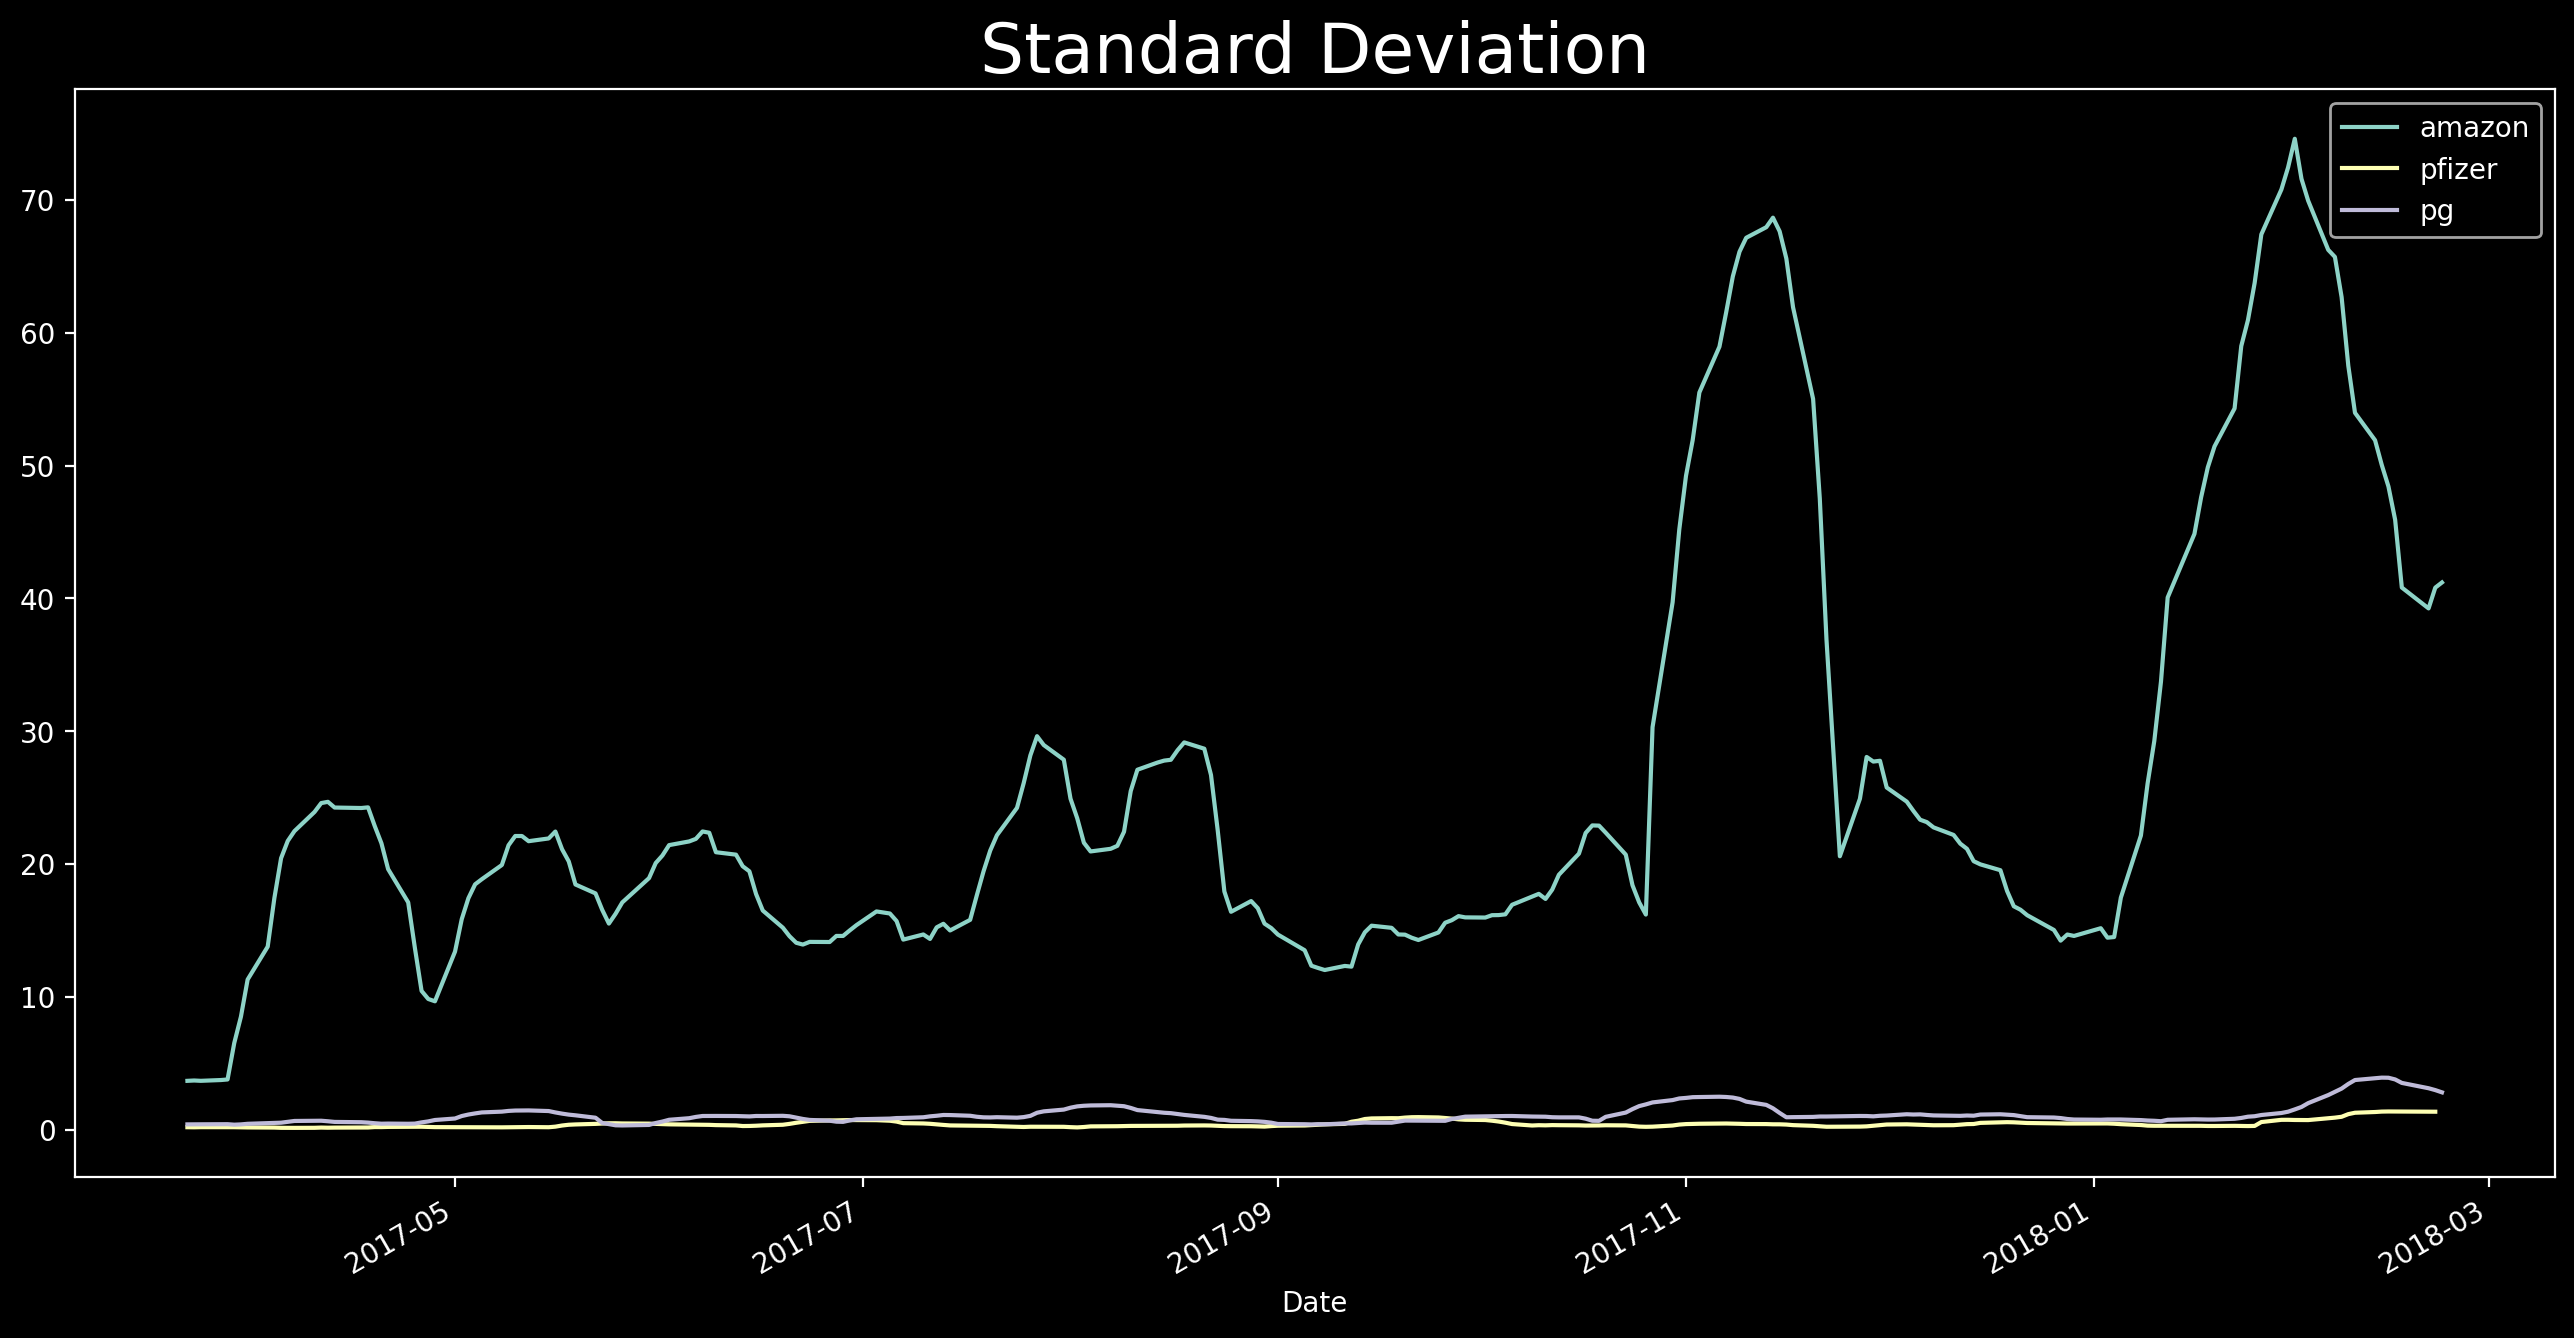

In [2]:
print("Standard Deviation")
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
pfizer = pd.read_csv("pfe.csv", index_col=0, parse_dates=True)["Adj Close"]
pg = pd.read_csv("pg.csv", index_col=0, parse_dates=True)["Adj Close"]
prices = pd.DataFrame(index=amazon.index)
prices["amazon"] = pd.DataFrame(amazon)
prices["pfizer"] = pd.DataFrame(pfizer)
prices["pg"] = pd.DataFrame(pg)
print("""
Prices Dataset
""")
print(prices.head(25))
prices_std = prices.rolling(window=20).std()
print("""
Prices Datset Standard Deviation
""")
print(prices_std.head(25))
prices_std.plot(ax=ax)
ax.set_title("Standard Deviation", fontsize=25)


Logarithmic Standard Deviation



Text(0.5, 1.0, 'Logarithmic Standard Deviation')

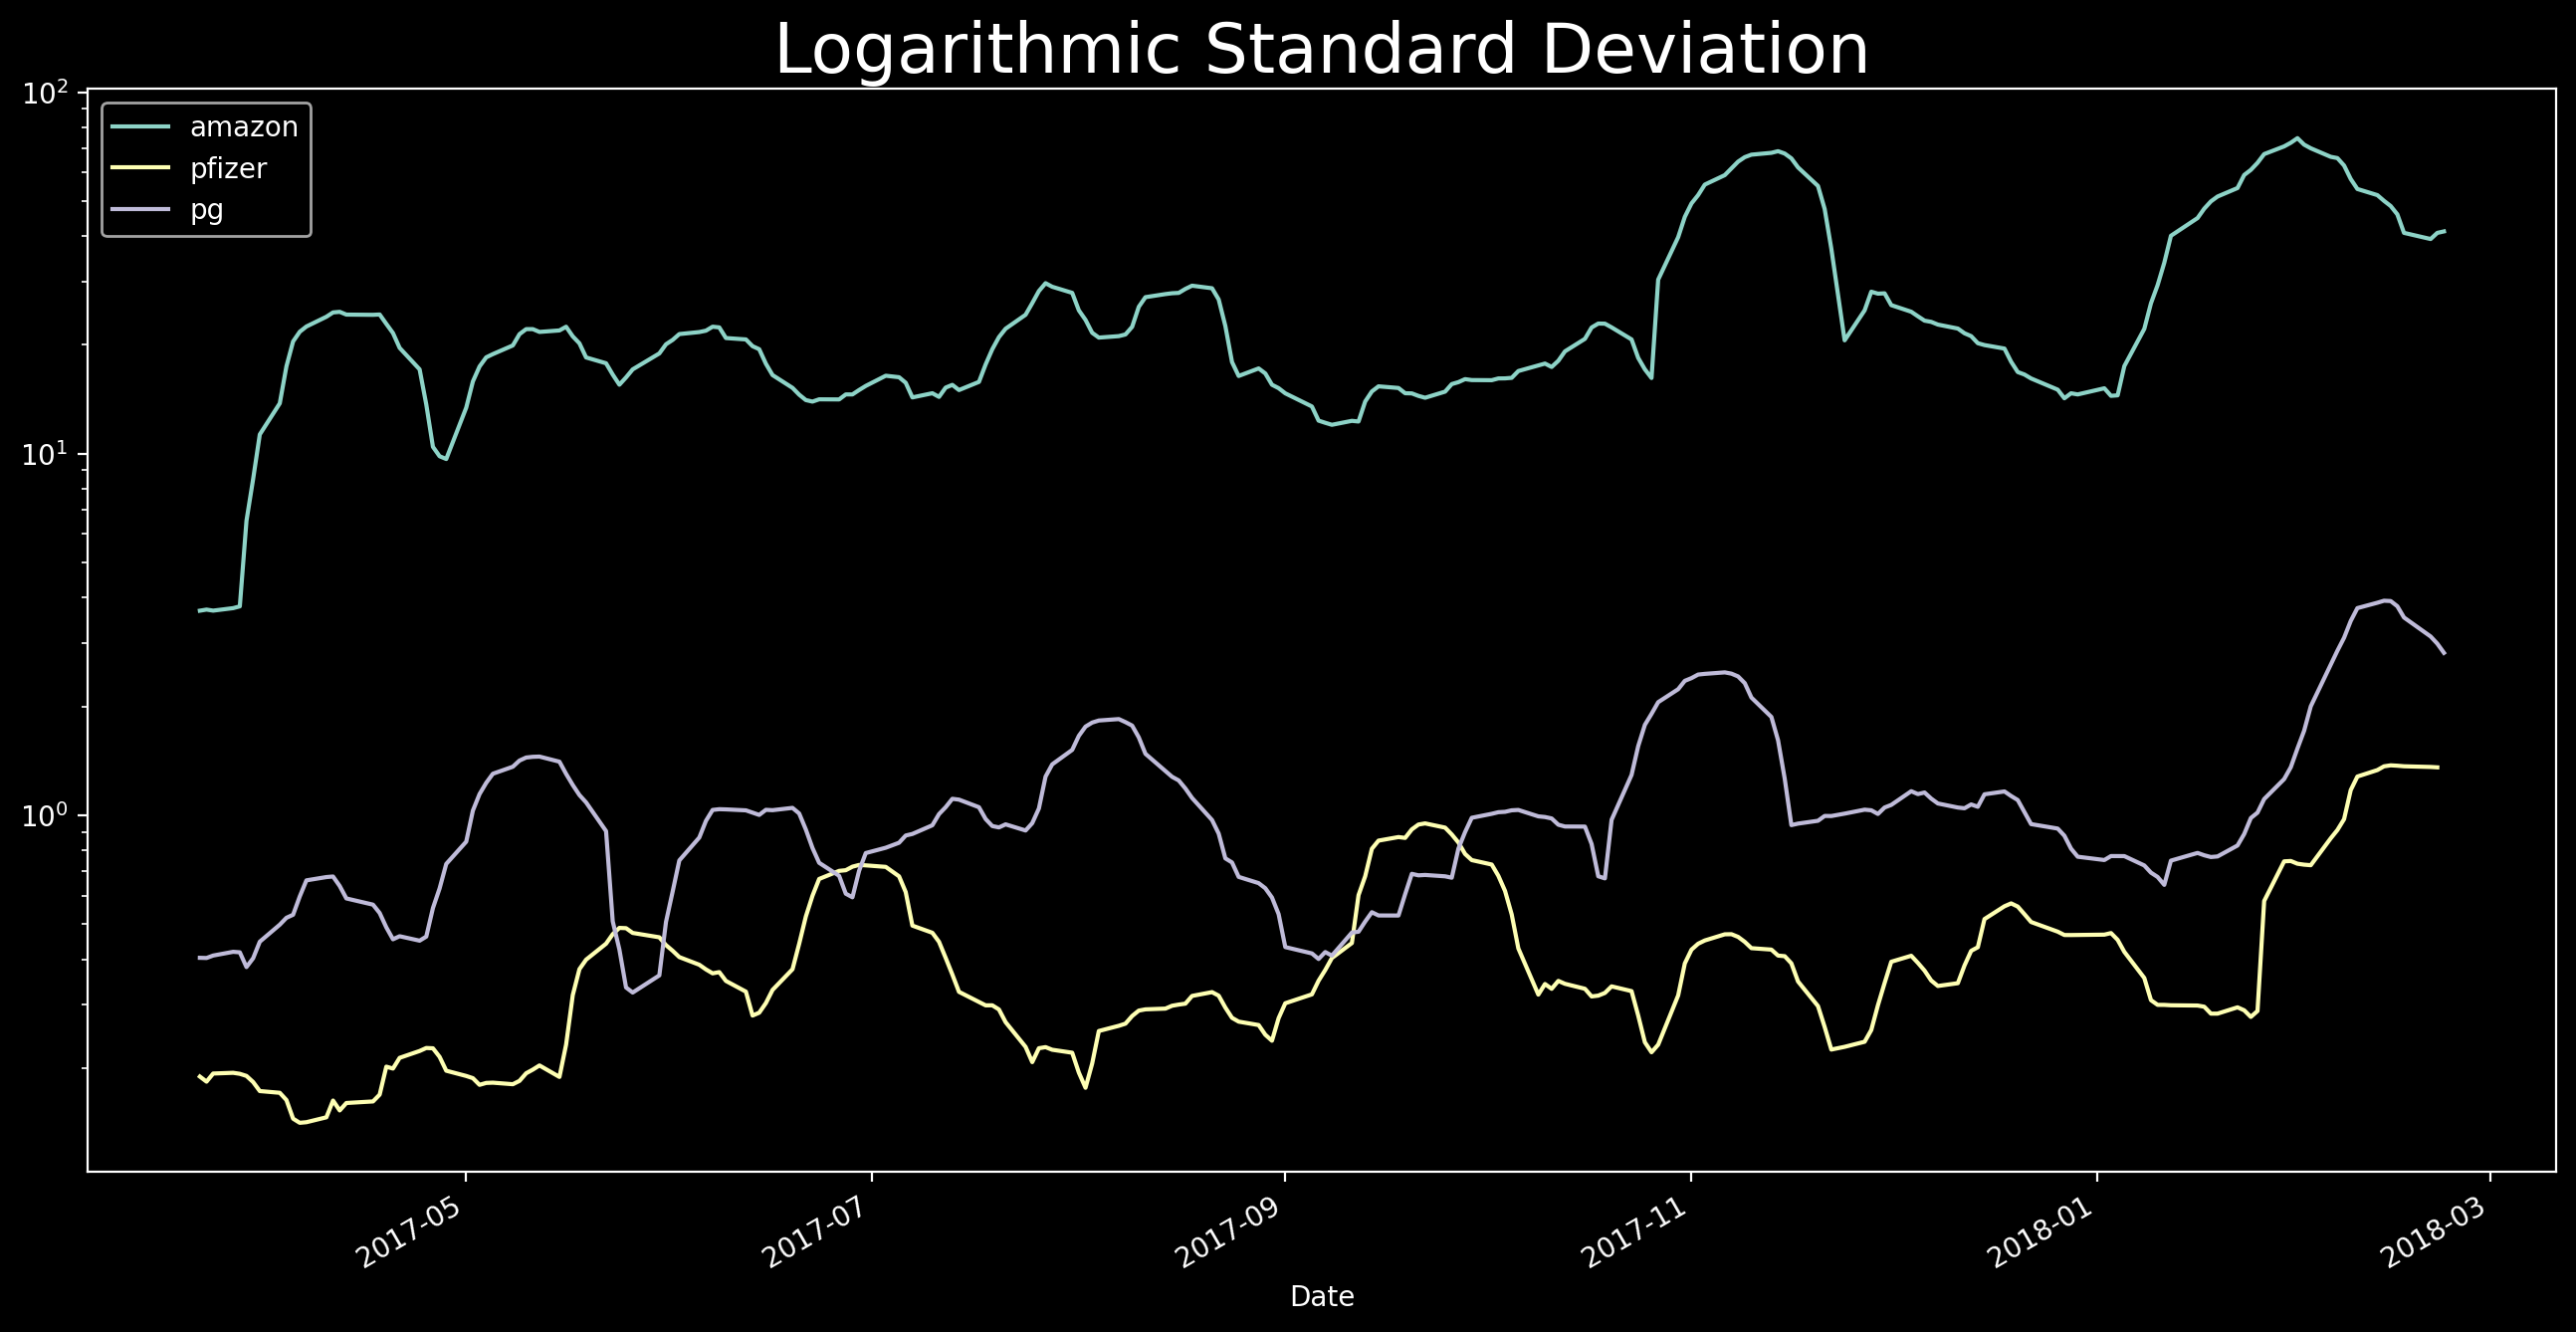

In [4]:
print("""
Logarithmic Standard Deviation
""")
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
prices_std.plot(ax=ax, logy=True)
ax.set_title("Logarithmic Standard Deviation", fontsize=25)


Exponentially Weighted Functions

Data.frame.ewm(span): computes exponentially weighted rolling window




Text(0.5, 1.0, 'Exponentially Weighted Functions')

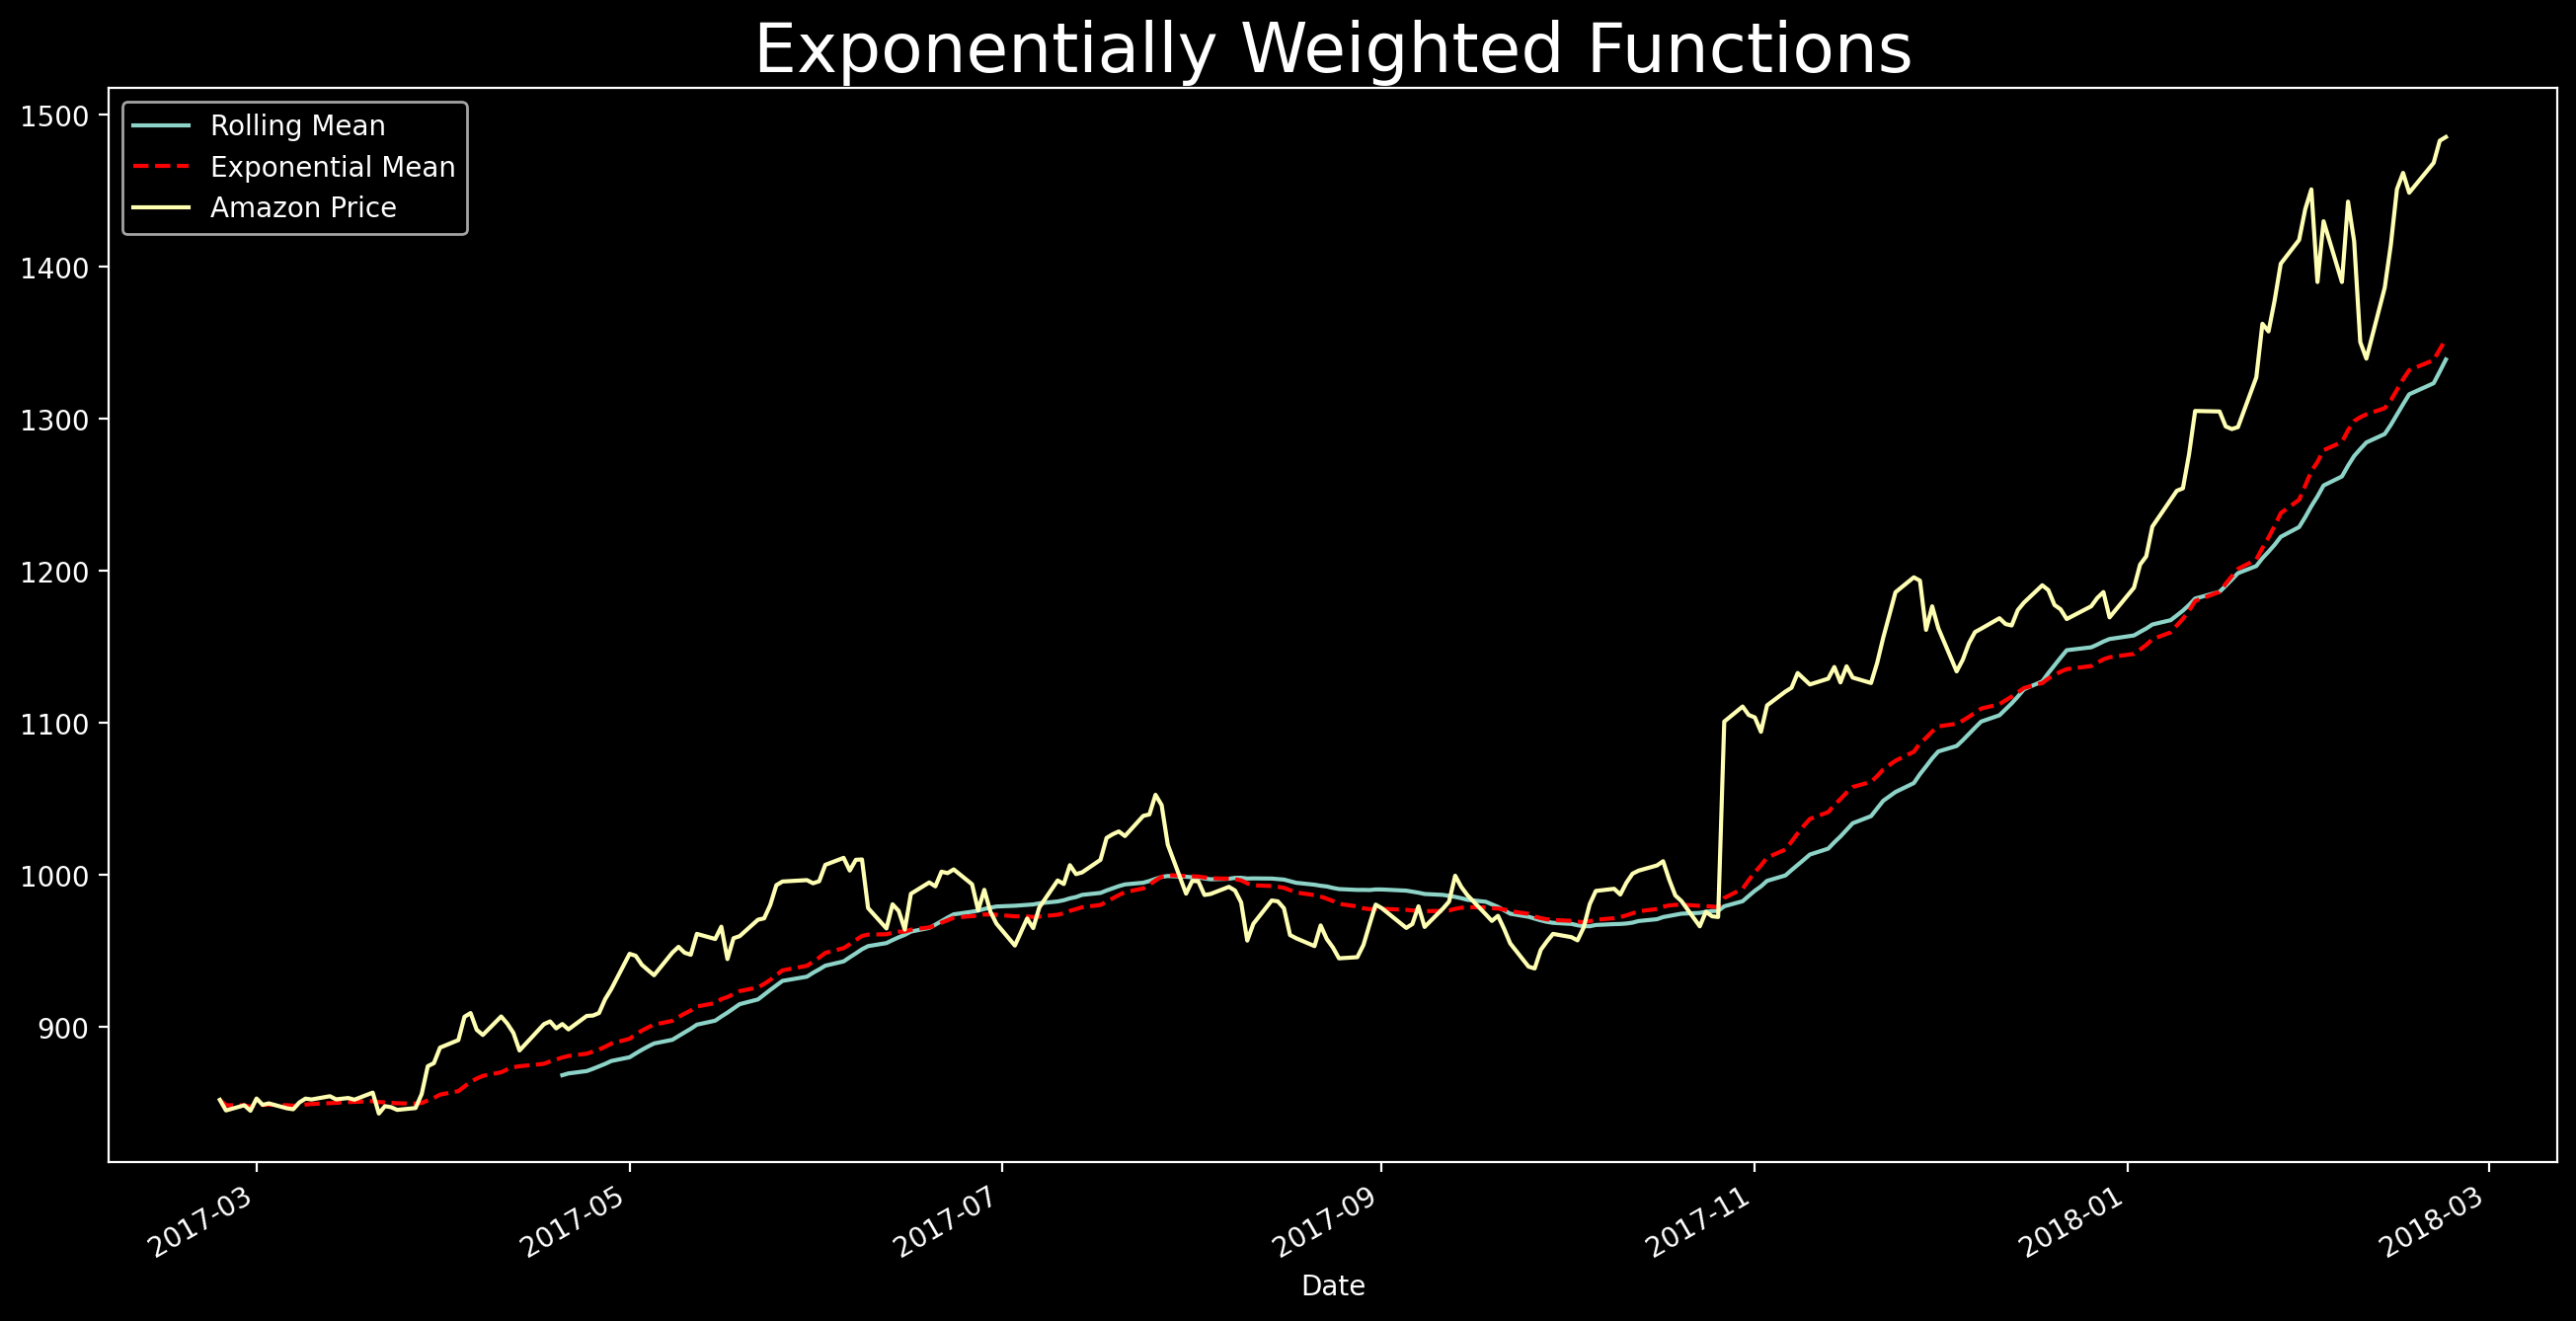

In [6]:
print("""
Exponentially Weighted Functions

Data.frame.ewm(span): computes exponentially weighted rolling window

""")

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
amazon.rolling(window=40).mean().plot(ax=ax, label = "Rolling Mean")
amazon.ewm(span=40).mean().plot(ax=ax, label = "Exponential Mean", linestyle="--", color="red")
amazon.plot(ax=ax, label = "Amazon Price")
ax.legend(loc="best")
ax.set_title("Exponentially Weighted Functions", fontsize=25)


Binary Moving Functions

Dataframe.pct_change(): Computes the percentage changes per period.


              amazon    pfizer        pg
Date                                    
2017-02-23       NaN       NaN       NaN
2017-02-24 -0.008155  0.005872 -0.000878
2017-02-27  0.004023  0.000584 -0.001757
2017-02-28 -0.004242 -0.004668  0.001980
2017-03-01  0.009514  0.008792  0.006479


Text(0.5, 1.0, 'Returns')

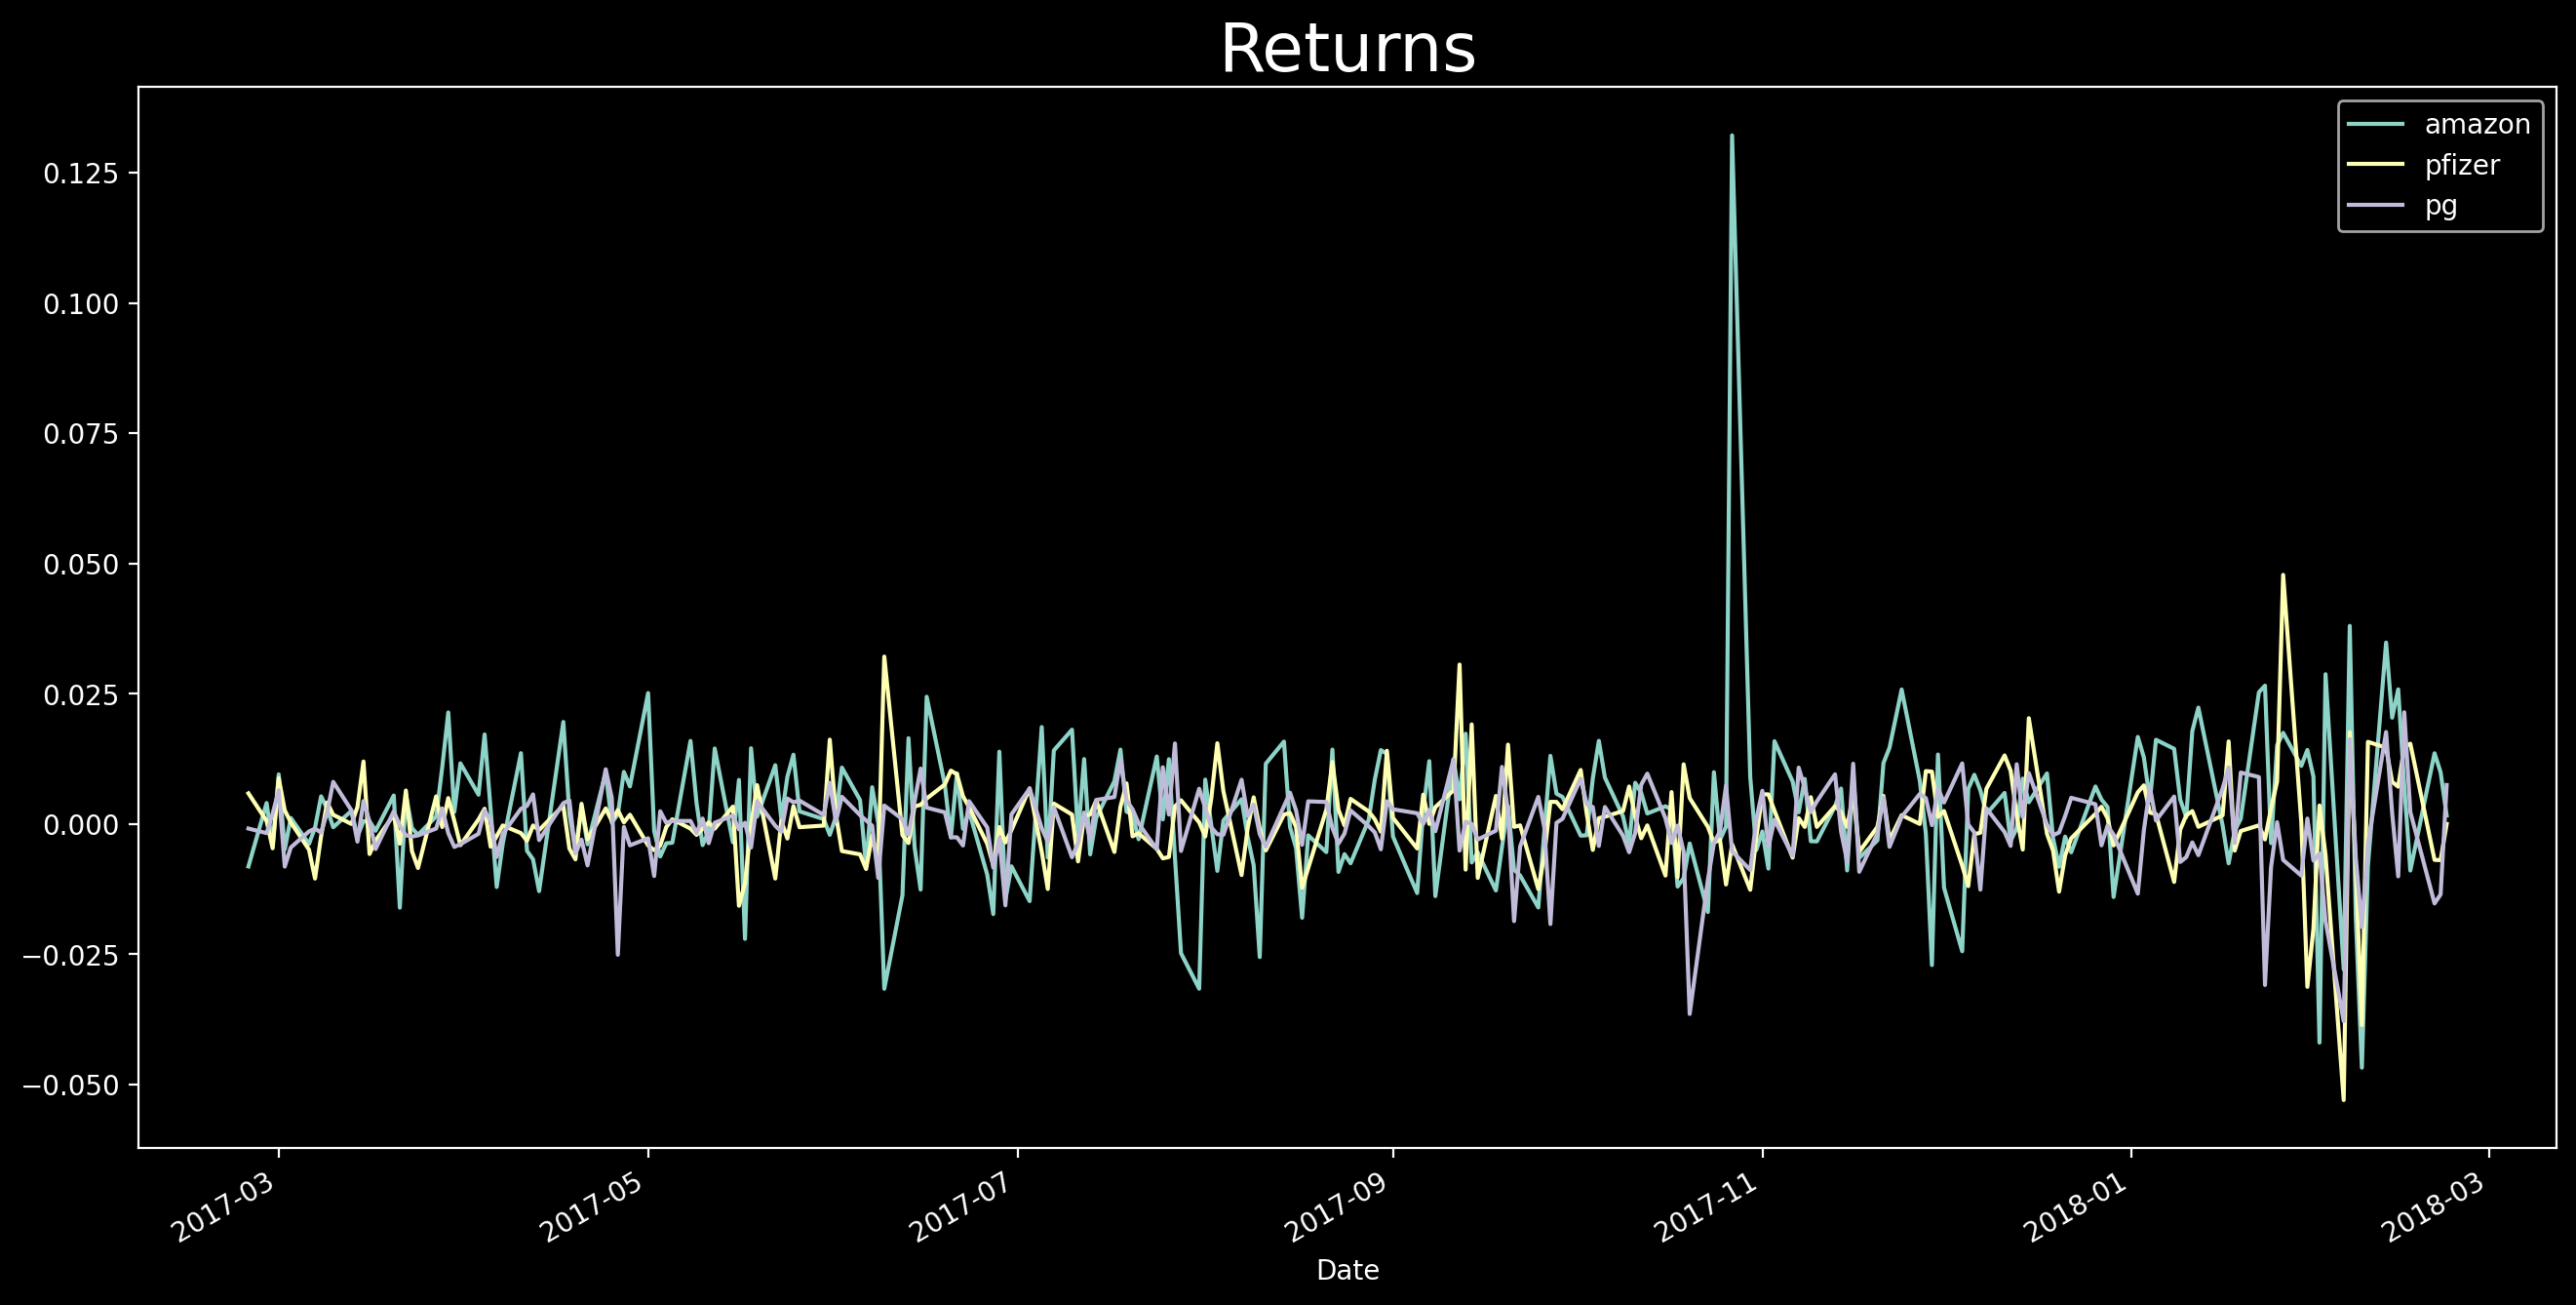

In [9]:
print("""
Binary Moving Functions

Dataframe.pct_change(): Computes the percentage changes per period.

""")

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
returns = prices.pct_change()
print(returns.head())
returns.plot(ax=ax)
ax.set_title("Returns", fontsize=25)



Dataframe.rolling().corr(benchmark): computes correlation between two time series




Text(0.5, 1.0, '20 Days Correlation')

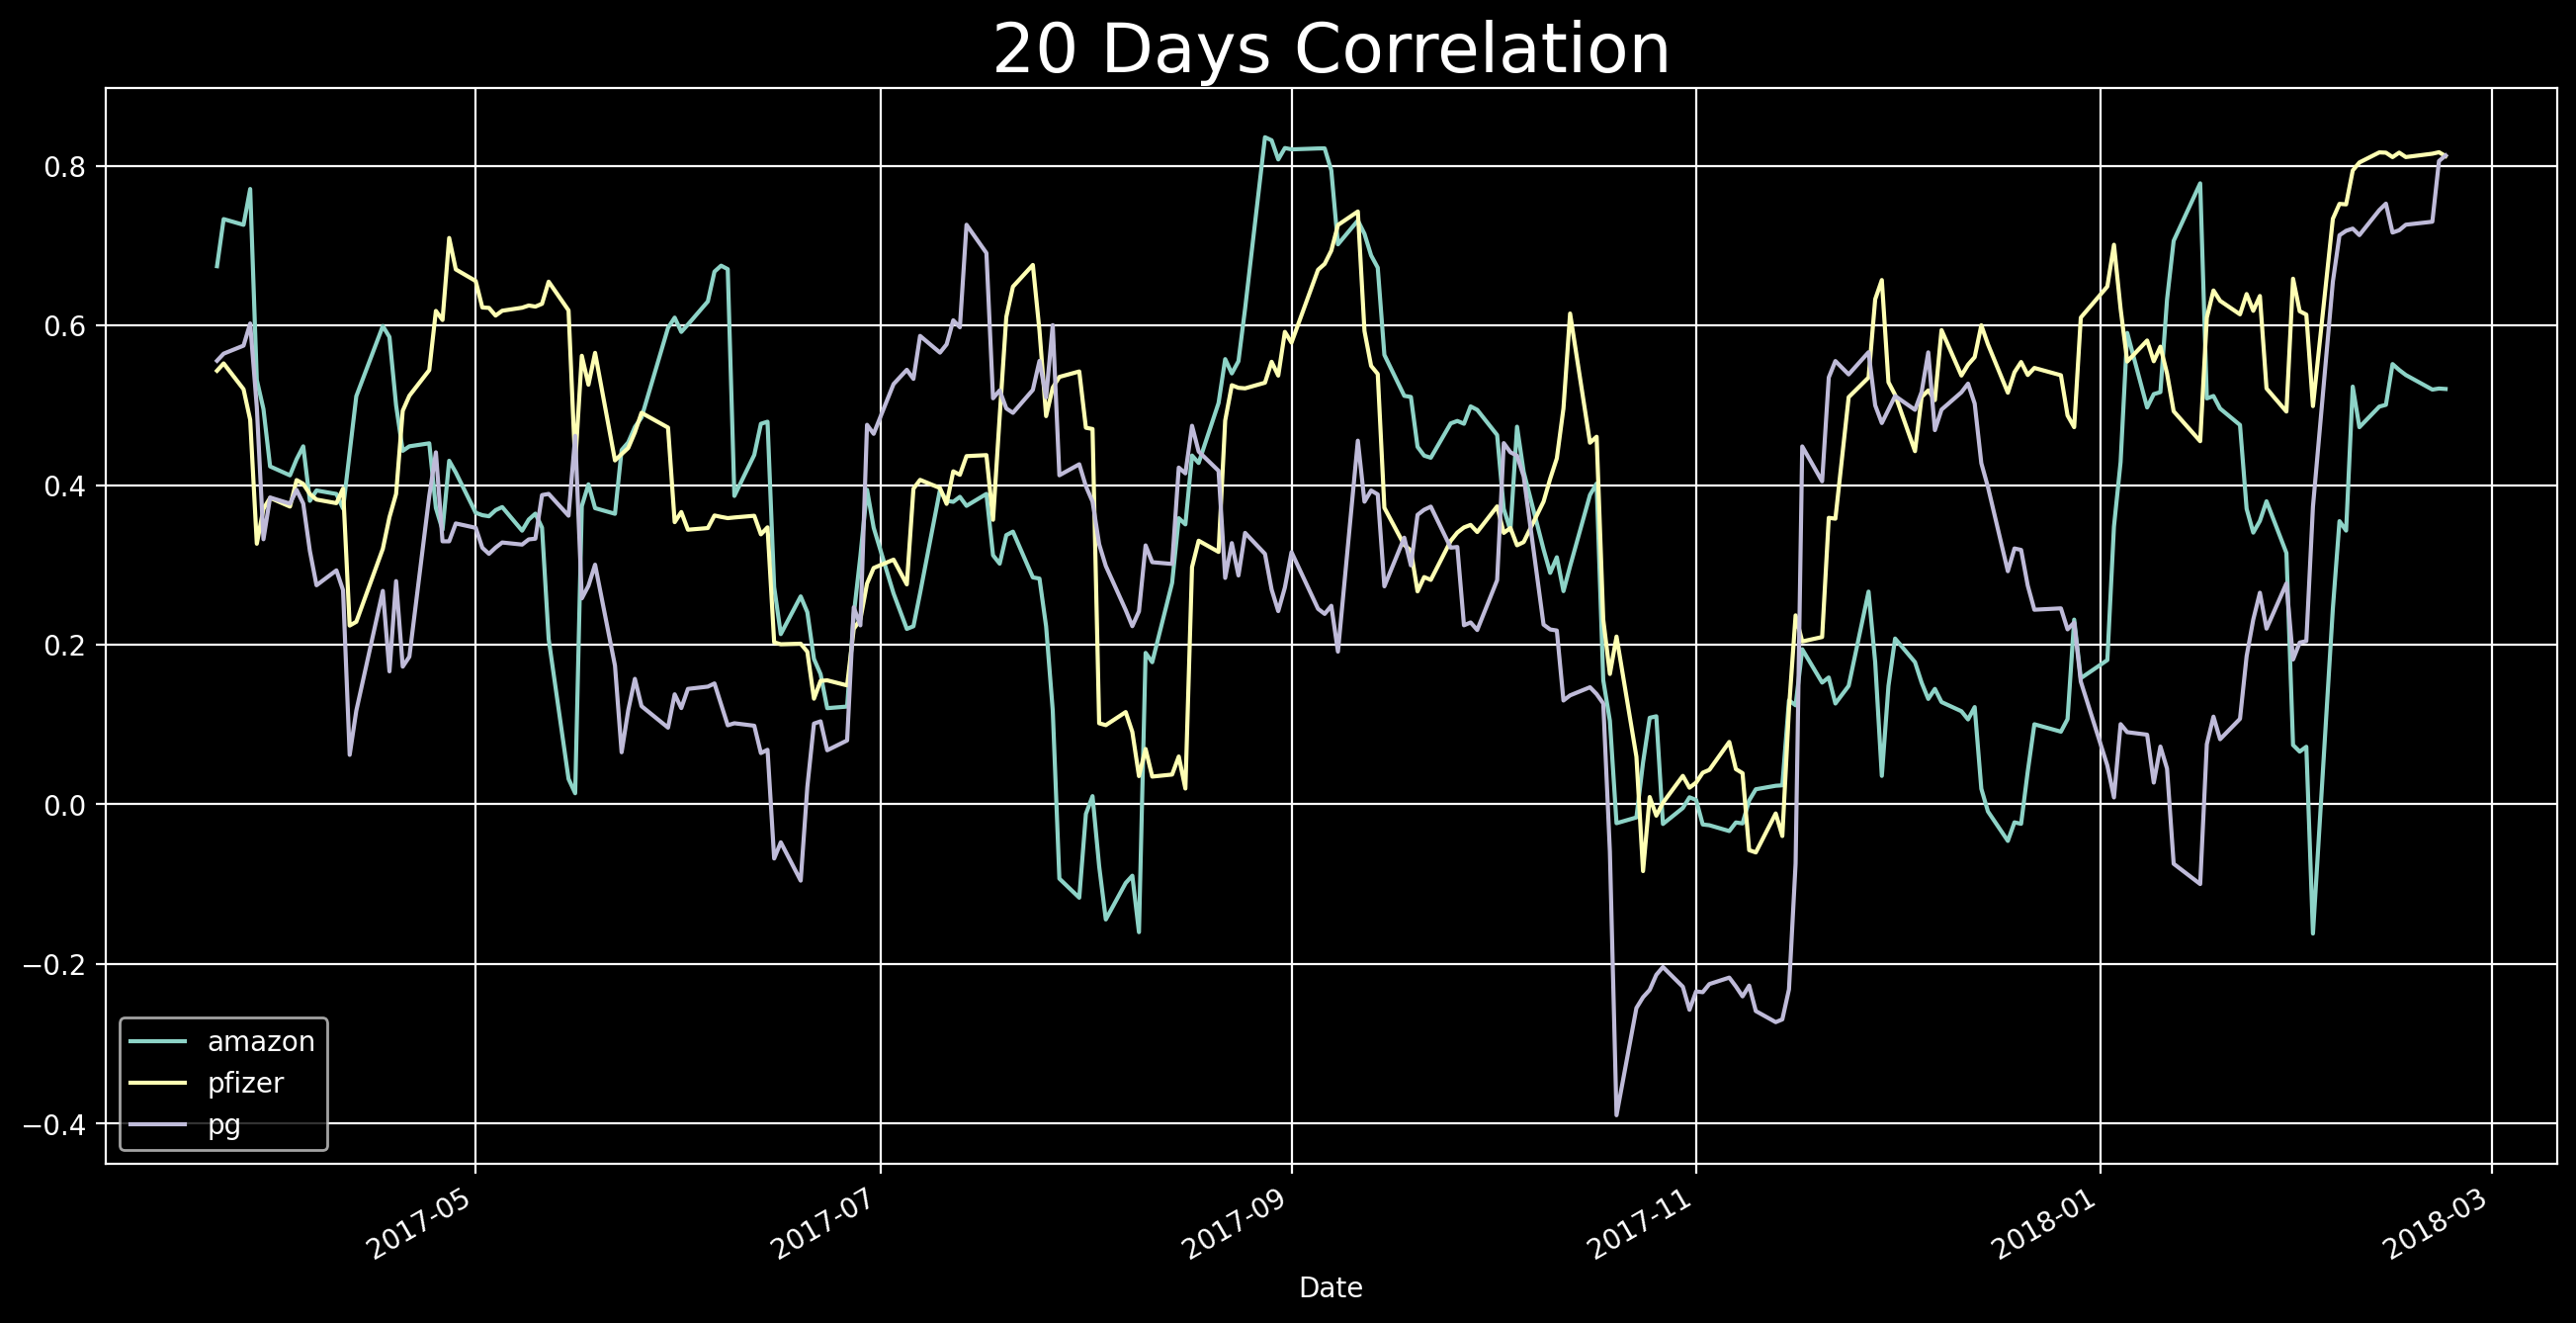

In [1]:
print("""

Dataframe.rolling().corr(benchmark): computes correlation between two time series

""")

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
DJI = pd.read_csv("dji.csv", index_col=0, parse_dates=True)["Adj Close"]
DJI_ret = DJI.pct_change()
corr = returns.rolling(window=20).corr(DJI_ret)
corr.plot(ax=ax)
ax.grid()
ax.set_title("20 Days Correlation", fontsize = 25)


Returns



Text(0.5, 1.0, 'Cumulative Returns')

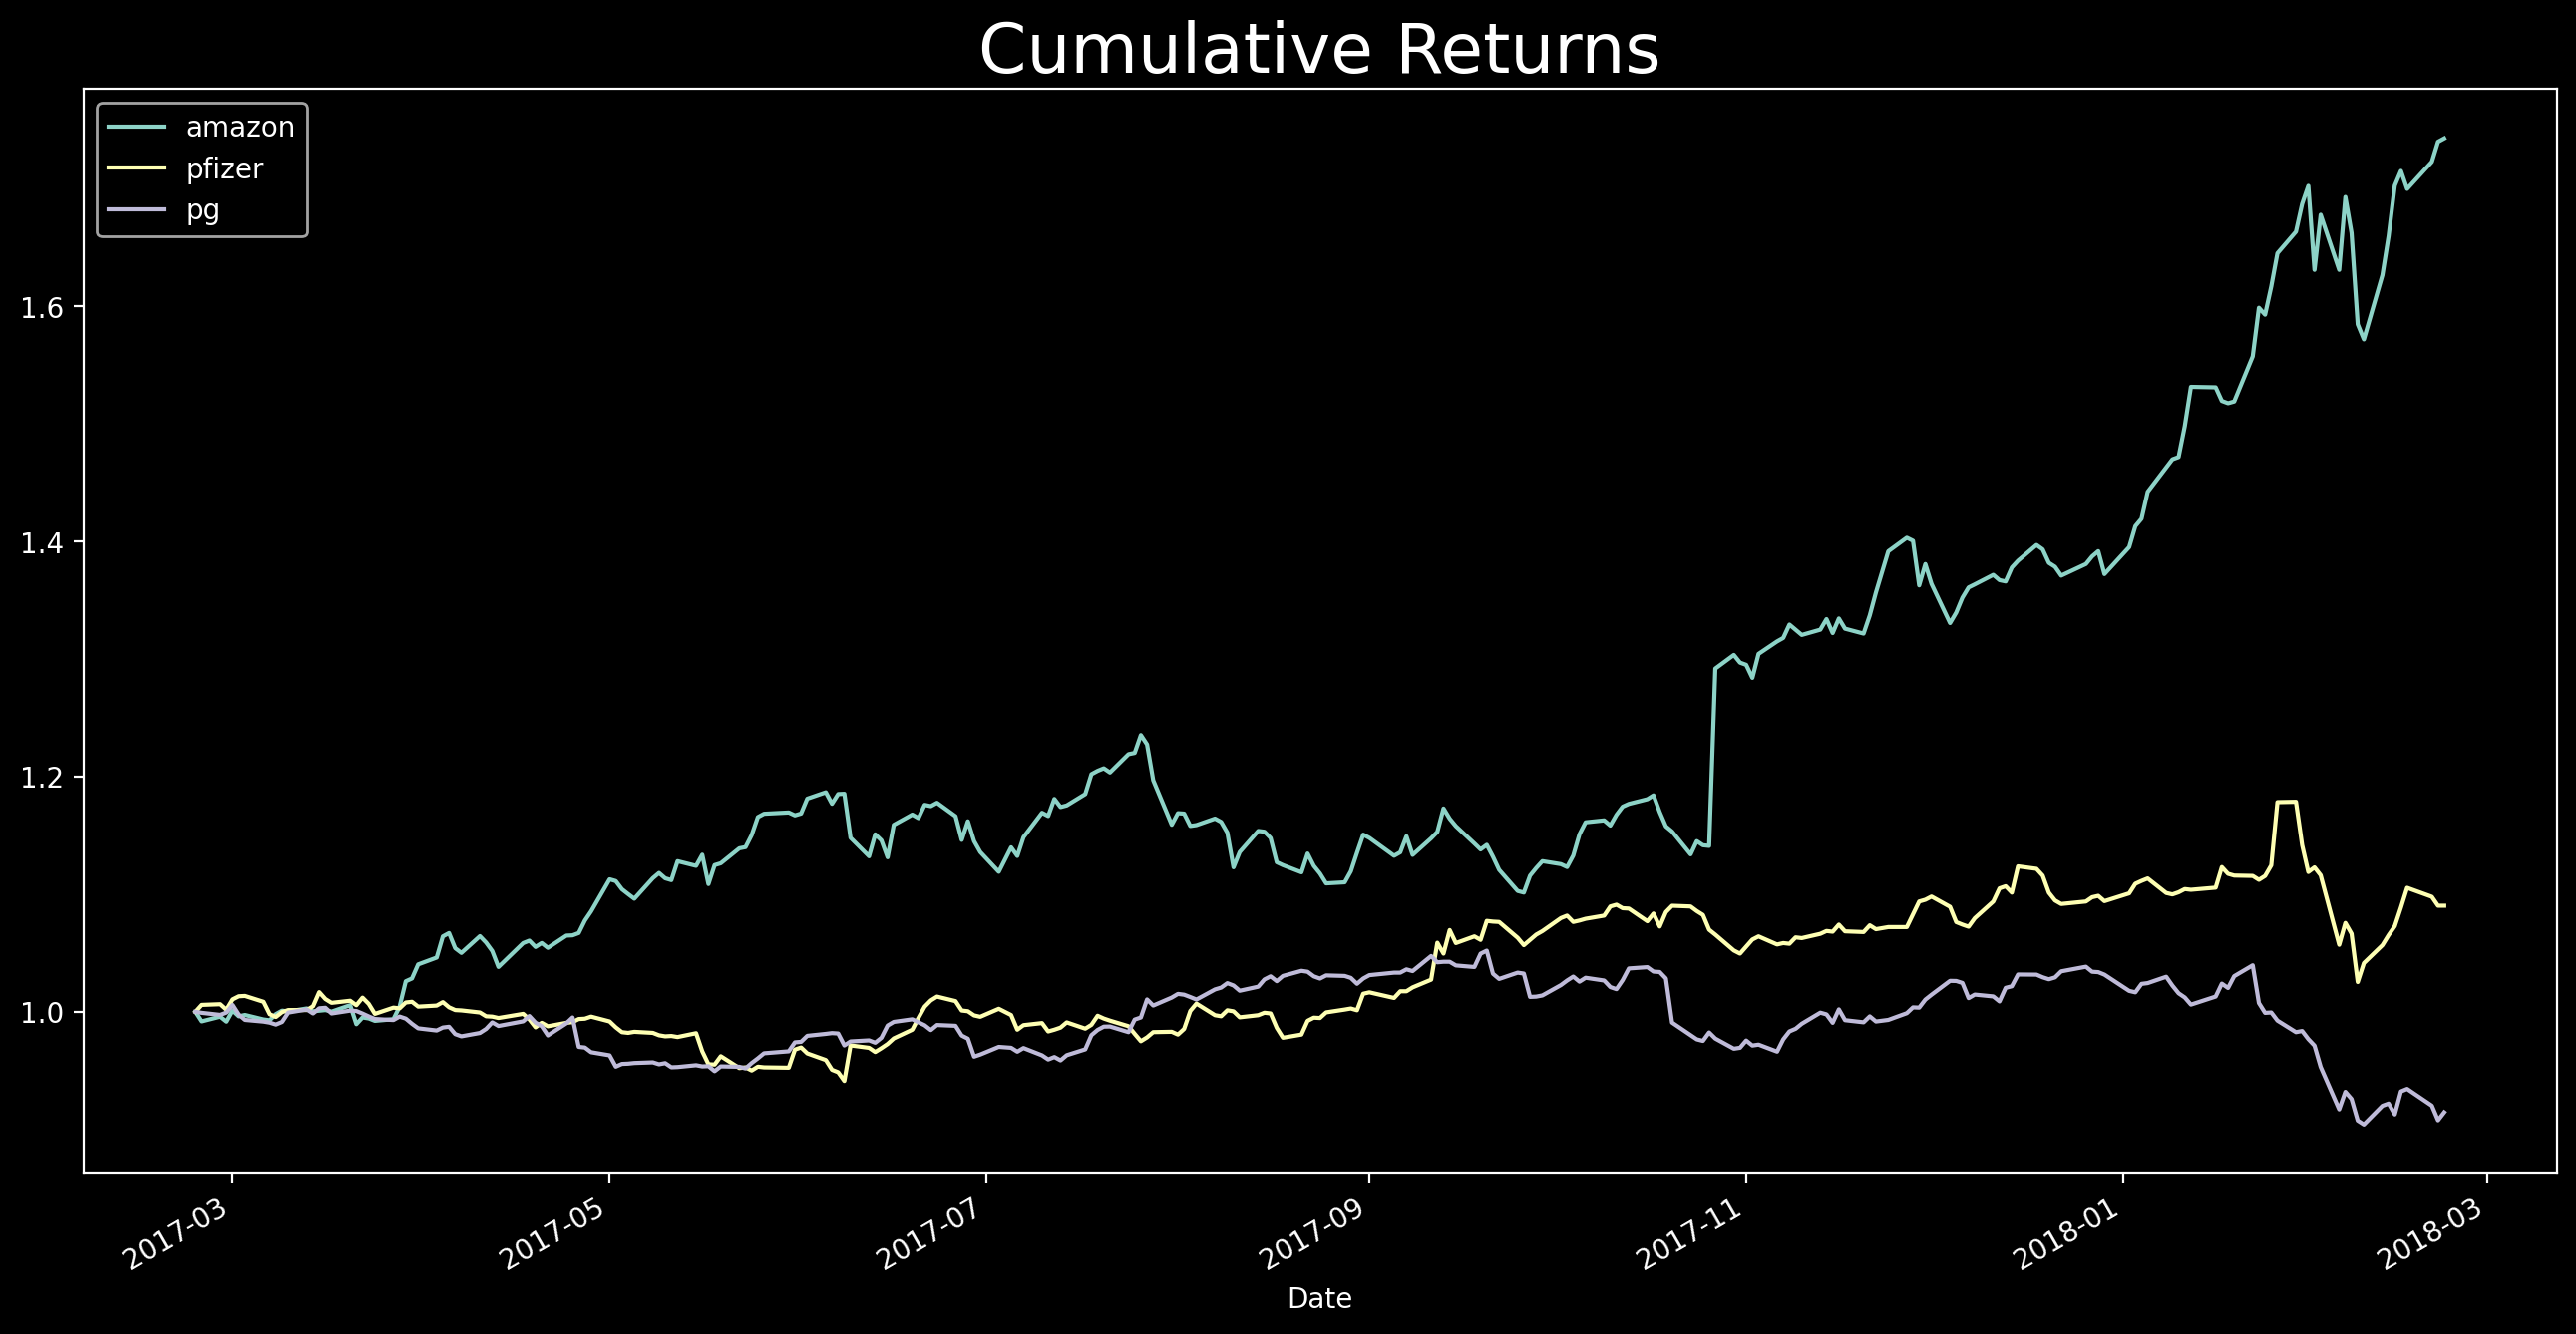

In [3]:
## Financial Applications ##
print("""
Returns
""")
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
ret_index = (1 + returns).cumprod()
stocks = ["amazon", "pfizer", "pg"]
for i in stocks:
    ret_index[i][0] = 1
ret_index.tail()

ret_index.plot(ax=ax)
ax.set_title("Cumulative Returns", fontsize=25)

In [5]:
### Monthly Returns ###

print("""

Monthly Returns

""")

returns_m = ret_index.resample("BM").last().pct_change()
returns_m.head()



Monthly Returns




,amazon,pfizer,pg
Date,,,
2017-02-28,NaN,NaN,NaN
2017-03-31,0.049110,0.002638,-0.013396
2017-04-28,0.043371,-0.008477,-0.020604
2017-05-31,0.075276,-0.028124,0.008703
2017-06-30,-0.026764,0.028790,-0.010671




Volatility




Text(0.5, 1.0, 'Volatility')

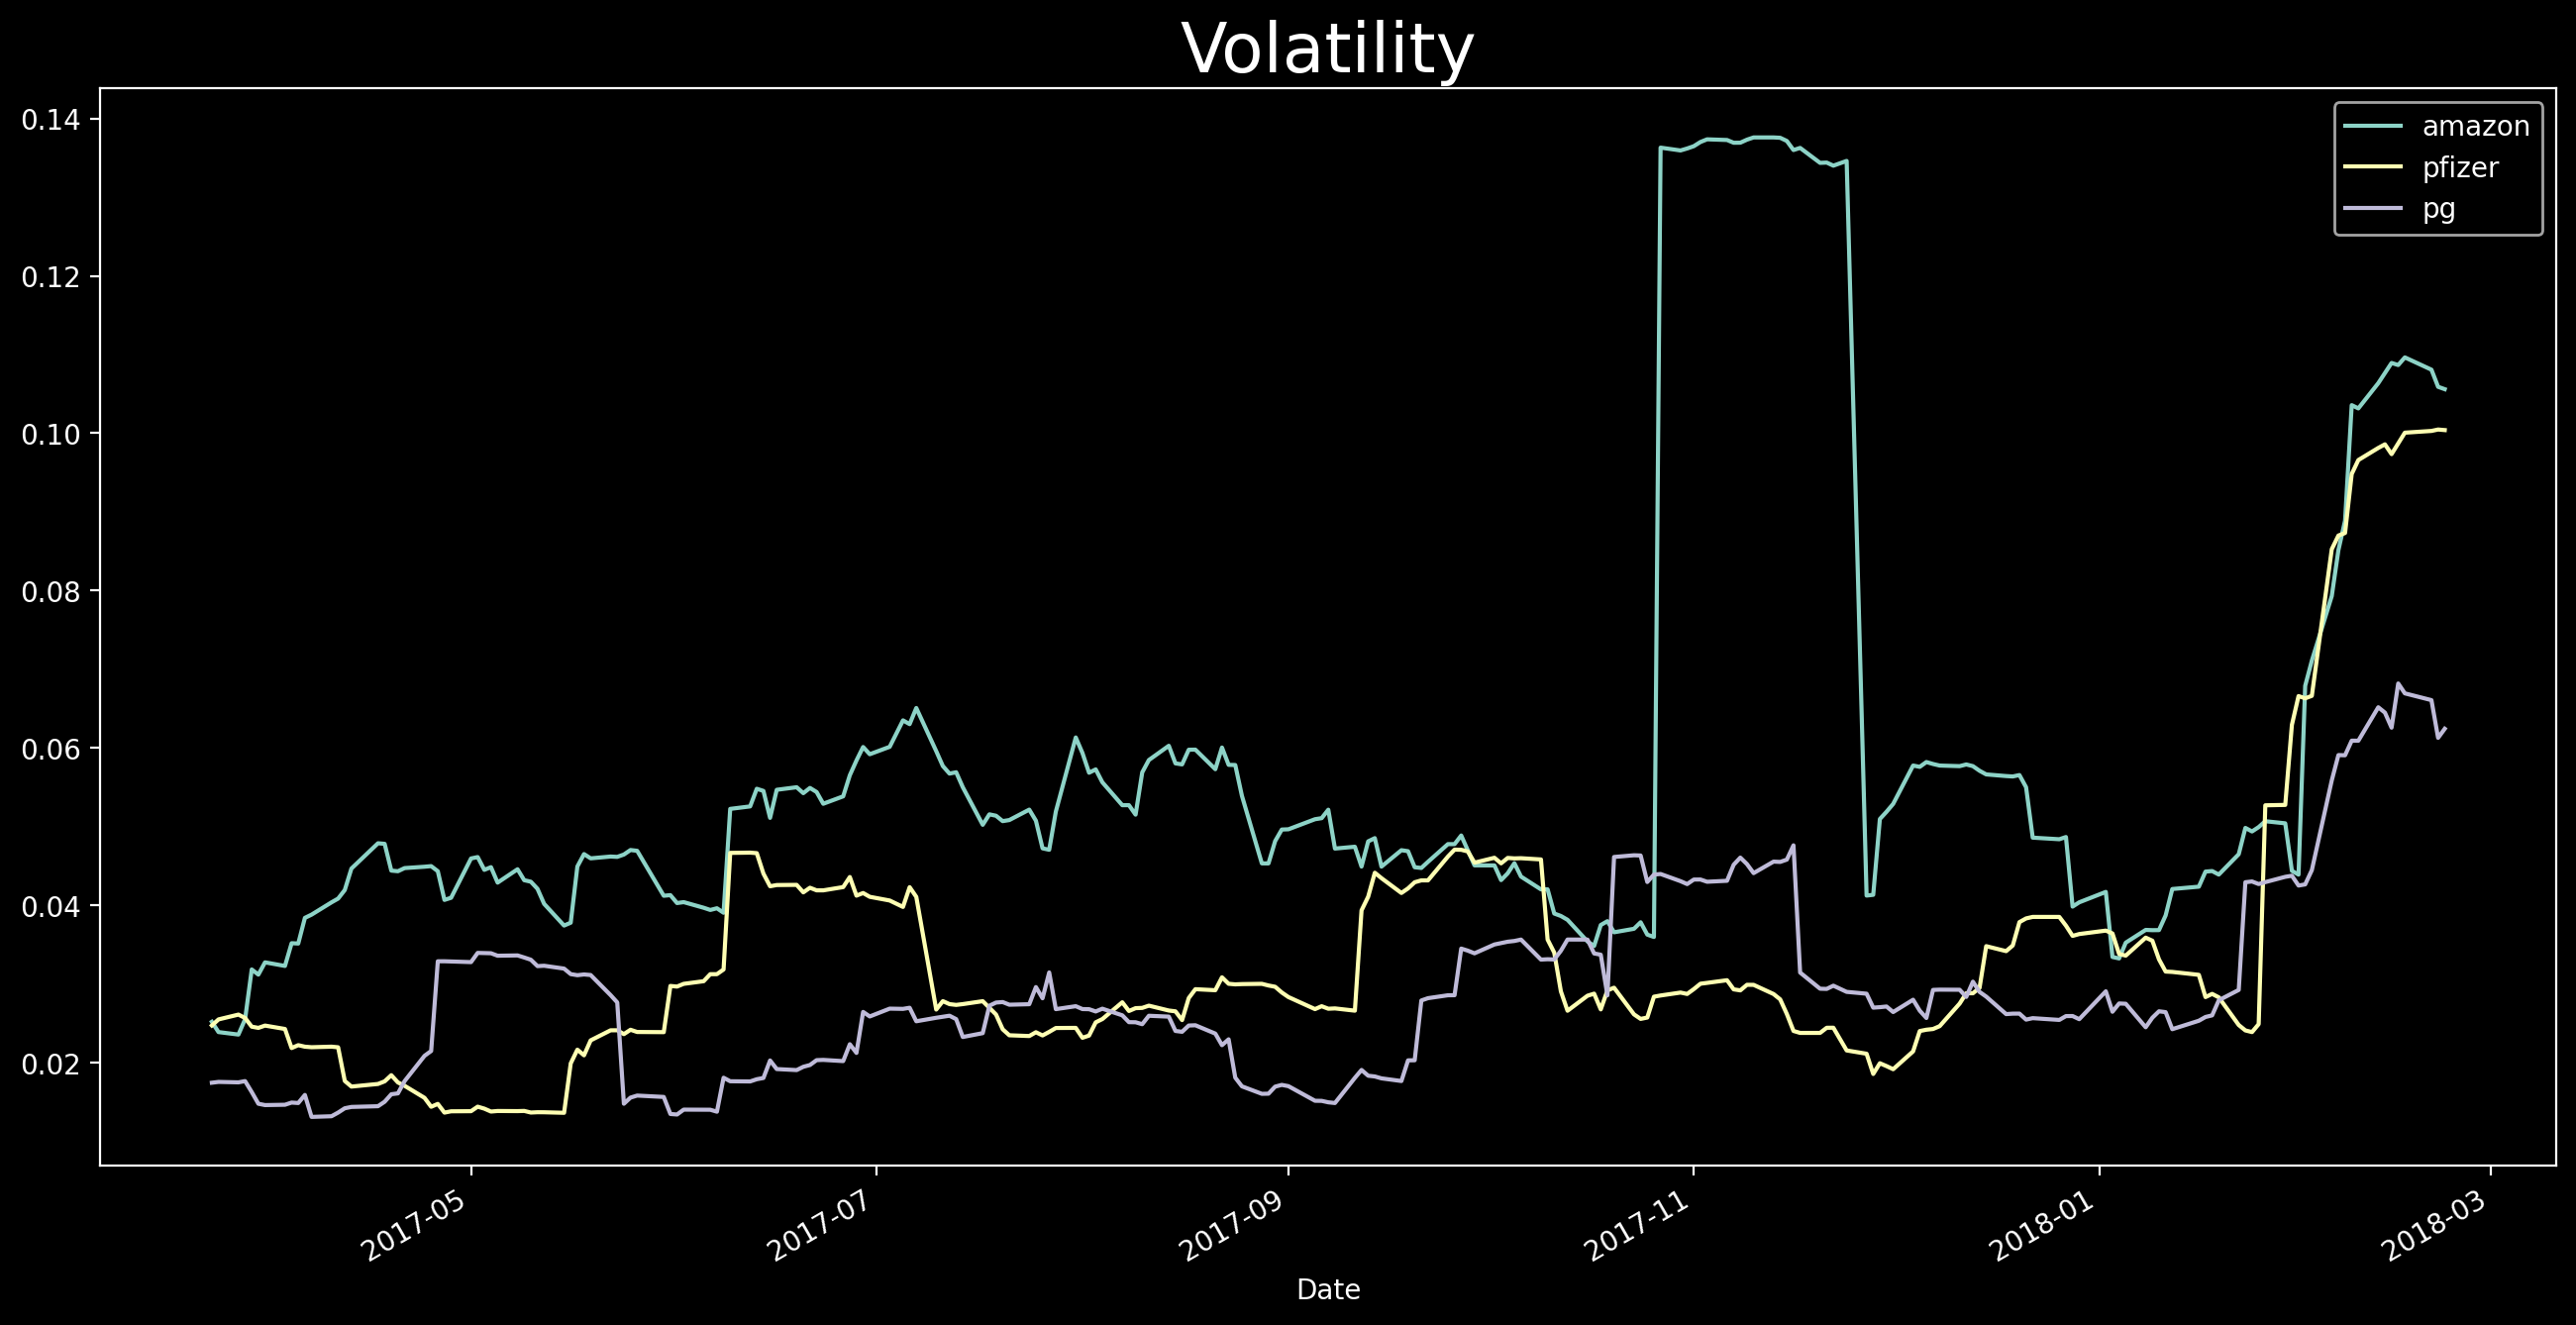

In [1]:
### Volatility ###
print("""

Volatility

""")
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
vola = returns.rolling(window=20).std()*np.sqrt(20)
vola.plot(ax=ax)
ax.set_title("Volatility", fontsize=25)



Economic Data




Get GDP Data


<class 'pandas.core.series.Series'>
                  gdp
1947-01-01   2182.681
1947-04-01   2176.892
1947-07-01   2172.432
1947-10-01   2206.452
1948-01-01   2239.682
...               ...
2022-07-01  21851.134
2022-10-01  21989.981
2023-01-01  22112.329
2023-04-01  22225.350
2023-07-01  22491.567

[307 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 307 entries, 1947-01-01 to 2023-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gdp     307 non-null    float64
dtypes: float64(1)
memory usage: 4.8 KB


Calculate % Growth Rate




Text(0.5, 1.0, 'US Real GDP Growth Rate (Annualized)')

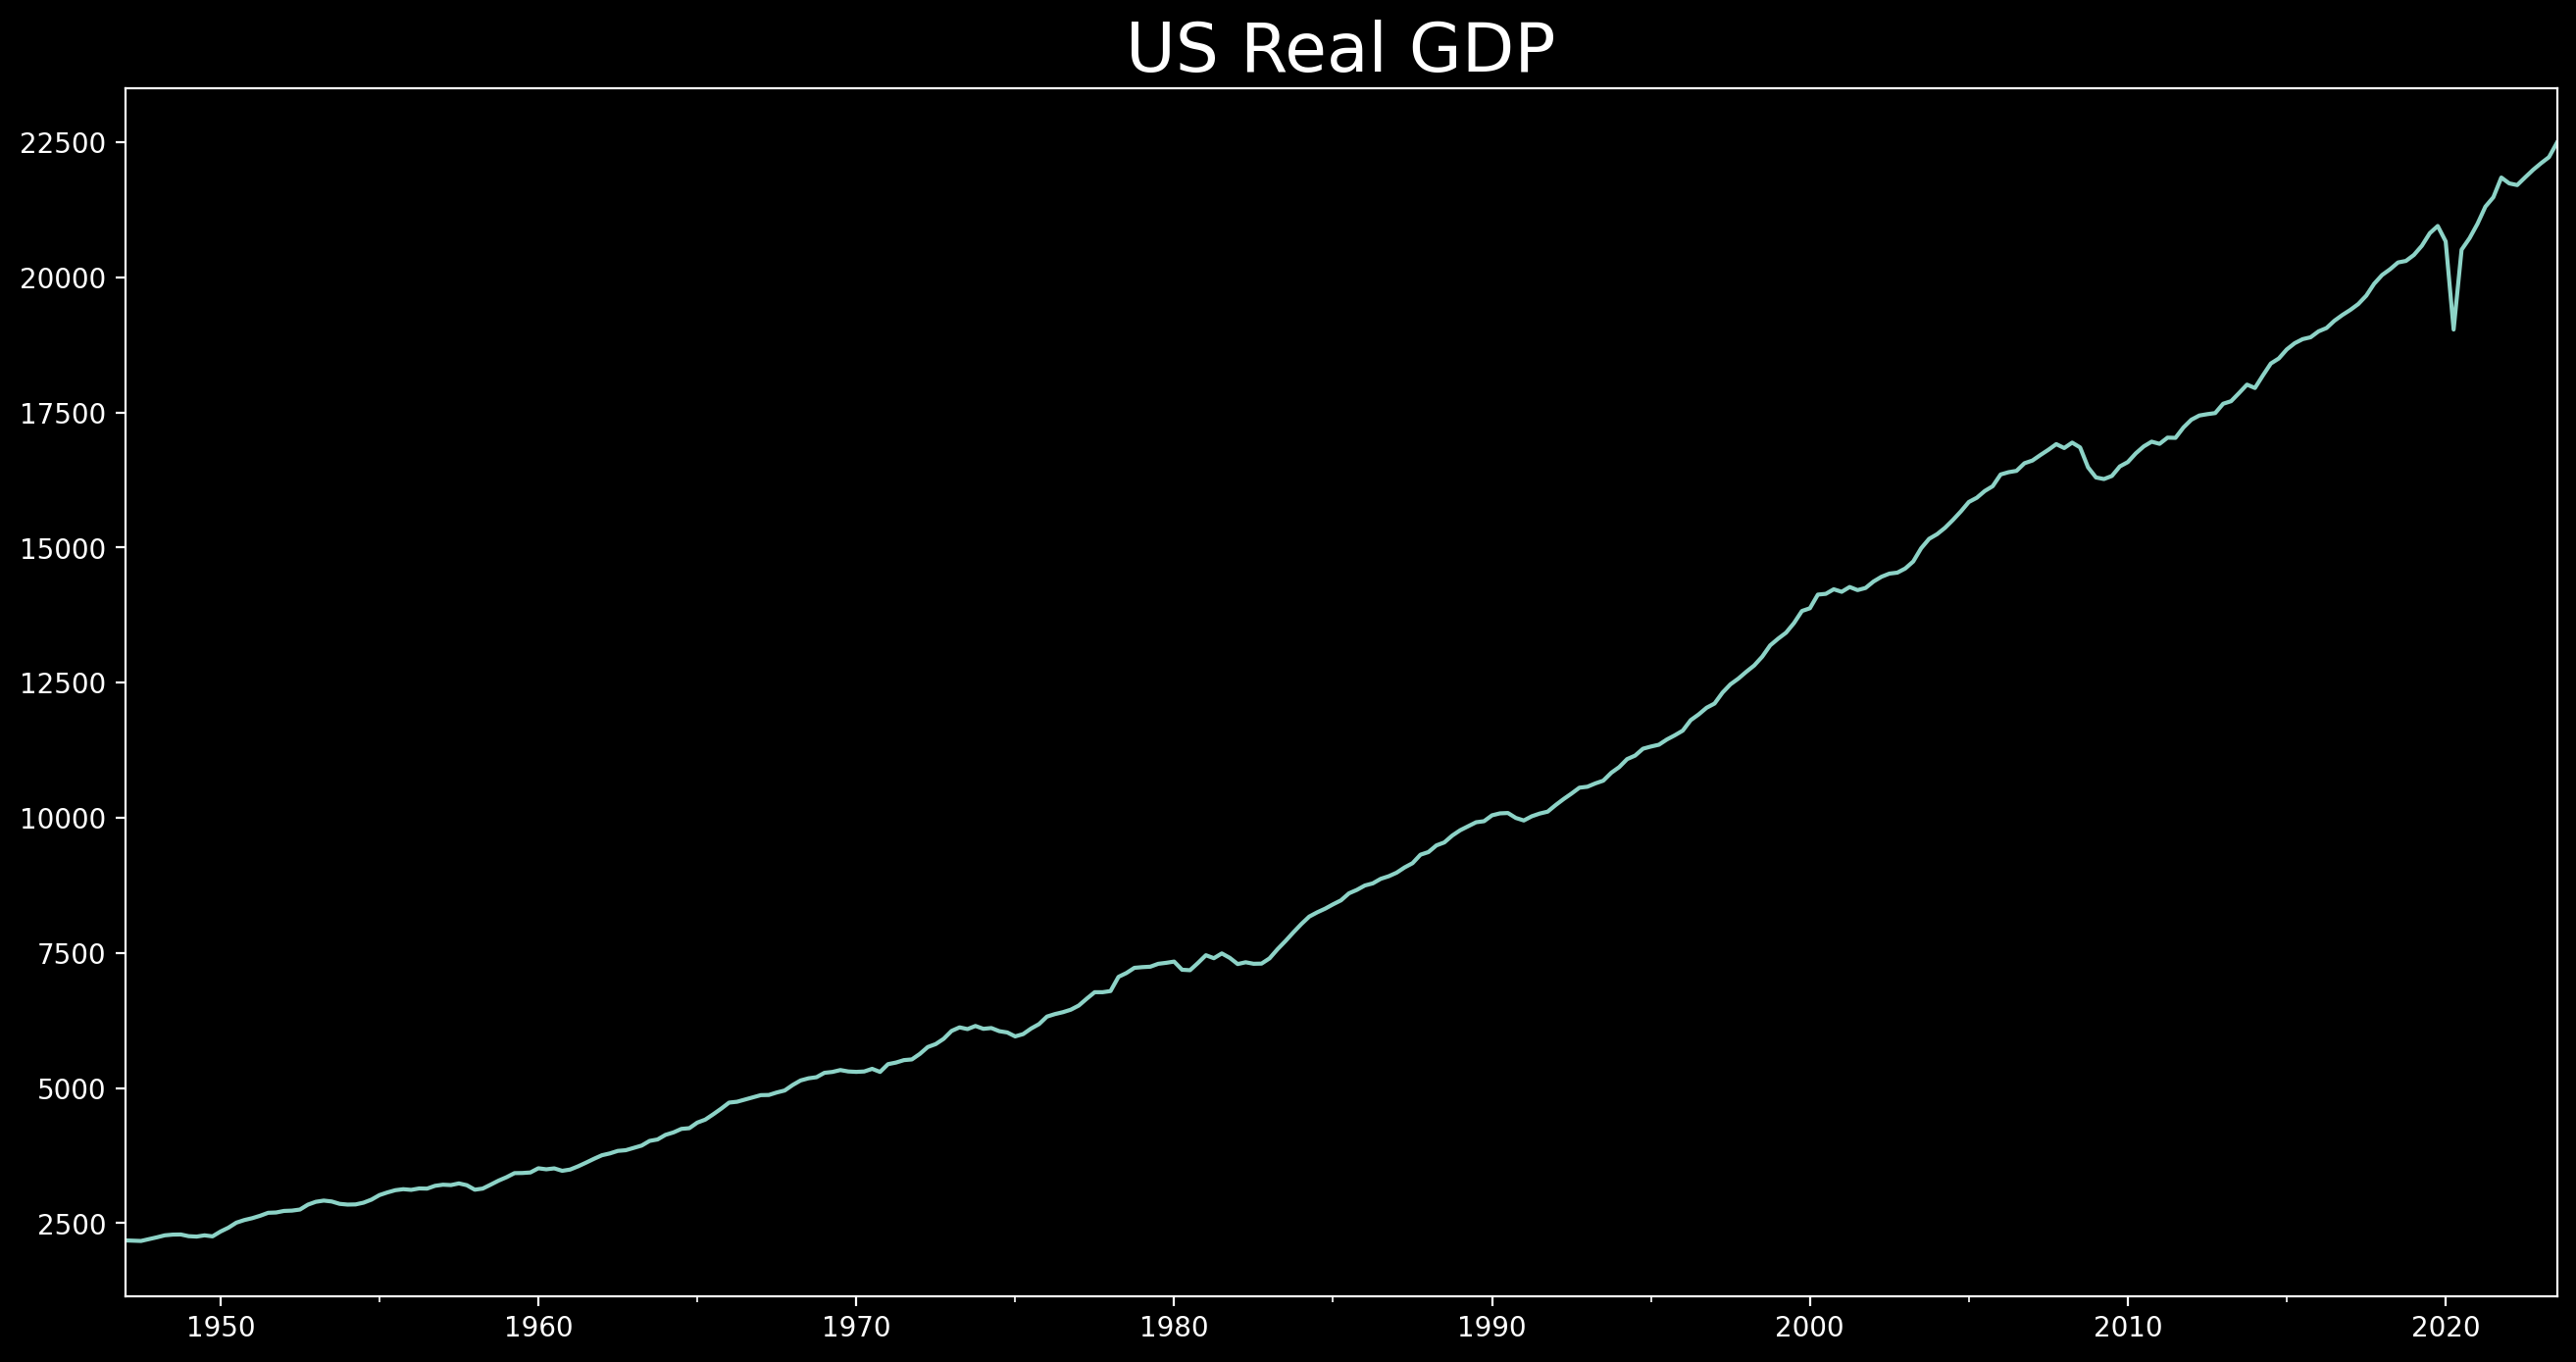

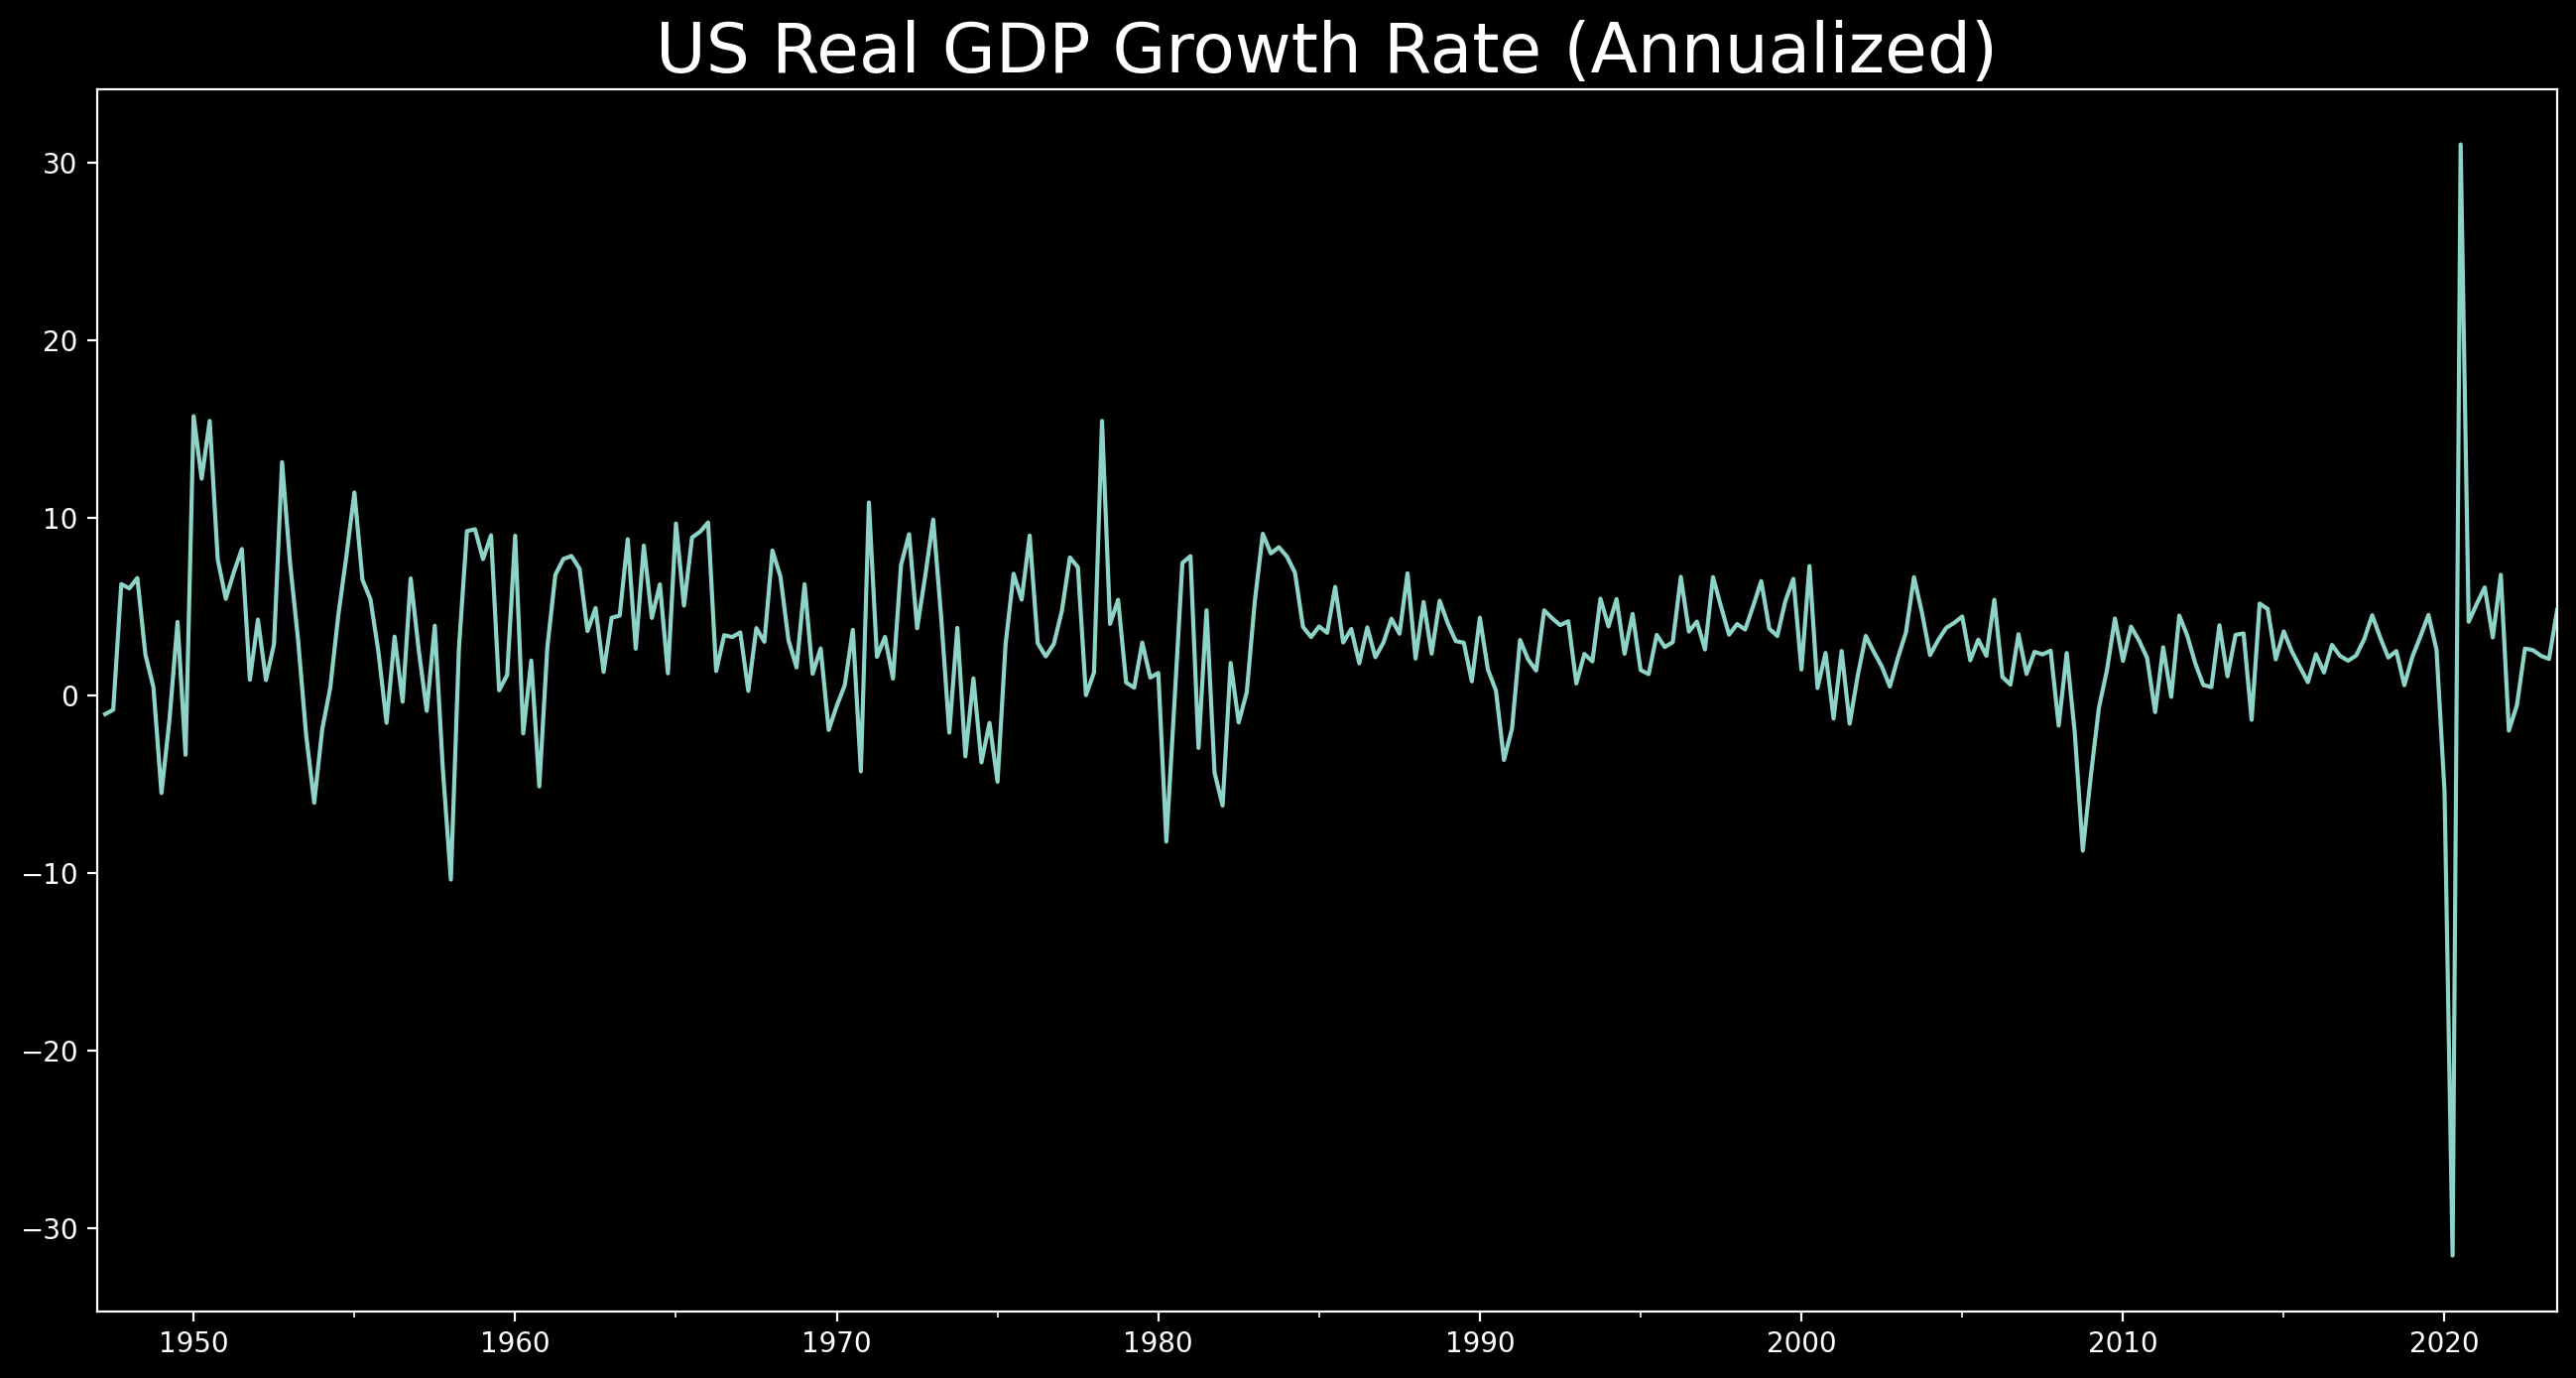

In [15]:
## ECONOMIC DATA ##
print("""

Economic Data

""")

import fredapi as fa
import pandas as pd
# from local settings import fred as settings
fred = fa.Fred(api_key='5dff353aa795091939d35284bca2ec53')

print("""

Get GDP Data

""")

gdp = fred.get_series('GDPC1')
gdp.name = 'gdp'
gdp.tail()
print(type(gdp))
gdp_df = pd.DataFrame(data = gdp)
print(gdp_df)
gdp_df.info()
gdp_df.head()

print("""

Calculate % Growth Rate

""")
gdp_df['growth_rate'] = gdp_df['gdp'].pct_change(periods=1)*400

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
gdp_df['gdp'].plot(ax=ax)
ax.set_title("US Real GDP", fontsize = 25)

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(1, 1, 1)
gdp_df['growth_rate'].plot(ax=ax)
ax.set_title("US Real GDP Growth Rate (Annualized)", fontsize=25)